# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [5]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [15]:
from cs231n.features import *

def extract_features_preprocess(X_train, X_val, X_test, num_color_bins):
    feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
    X_train_feats = extract_features(X_train, feature_fns, verbose=True)
    X_val_feats = extract_features(X_val, feature_fns)
    X_test_feats = extract_features(X_test, feature_fns)

    # Preprocessing: Subtract the mean feature
    mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
    X_train_feats -= mean_feat
    X_val_feats -= mean_feat
    X_test_feats -= mean_feat

    # Preprocessing: Divide by standard deviation. This ensures that each feature
    # has roughly the same scale.
    std_feat = np.std(X_train_feats, axis=0, keepdims=True)
    X_train_feats /= std_feat
    X_val_feats /= std_feat
    X_test_feats /= std_feat

    # Preprocessing: Add a bias dimension
    X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
    X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
    X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
    
    return X_train_feats, X_val_feats, X_test_feats

In [194]:
 X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train, X_val, X_test,50)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [195]:
X_train_feats.shape

(49000, 195)

In [196]:
 X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train, X_val, X_test,500)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [197]:
X_train_feats.shape

(49000, 645)

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [ ]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

color_bins = [4, 10, 50]
learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for ncb in color_bins:
    X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train,X_val, X_test,
                                                                          num_color_bins=ncb)
    for lr in learning_rates:
        for rs in regularization_strengths:
            svm = LinearSVM()
            print('lr %e rs %e ' % (lr, rs))
            svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,
                      num_iters=1500, verbose=True)

            y_train_pred = svm.predict(X_train_feats)
            train_acc = np.mean(y_train == y_train_pred)

            y_val_pred = svm.predict(X_val_feats)
            val_acc  = np.mean(y_val == y_val_pred)

            results[(ncb, lr, rs)] = (train_acc, val_acc)
            if val_acc > best_val:
                best_val = val_acc


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [17]:
# Print out results.
for ncb, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(ncb, lr, reg)]
    print('ncb %.2f lr %.2e reg %.2e train accuracy: %.2f val accuracy: %.2f' % (
                ncb, lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

ncb 4.00 lr 1.00e-09 reg 5.00e+04 train accuracy: 0.10 val accuracy: 0.09
ncb 4.00 lr 1.00e-09 reg 5.00e+05 train accuracy: 0.09 val accuracy: 0.08
ncb 4.00 lr 1.00e-09 reg 5.00e+06 train accuracy: 0.40 val accuracy: 0.41
ncb 4.00 lr 1.00e-08 reg 5.00e+04 train accuracy: 0.09 val accuracy: 0.10
ncb 4.00 lr 1.00e-08 reg 5.00e+05 train accuracy: 0.40 val accuracy: 0.41
ncb 4.00 lr 1.00e-08 reg 5.00e+06 train accuracy: 0.39 val accuracy: 0.40
ncb 4.00 lr 1.00e-07 reg 5.00e+04 train accuracy: 0.40 val accuracy: 0.41
ncb 4.00 lr 1.00e-07 reg 5.00e+05 train accuracy: 0.39 val accuracy: 0.40
ncb 4.00 lr 1.00e-07 reg 5.00e+06 train accuracy: 0.31 val accuracy: 0.31
ncb 10.00 lr 1.00e-09 reg 5.00e+04 train accuracy: 0.11 val accuracy: 0.11
ncb 10.00 lr 1.00e-09 reg 5.00e+05 train accuracy: 0.12 val accuracy: 0.12
ncb 10.00 lr 1.00e-09 reg 5.00e+06 train accuracy: 0.41 val accuracy: 0.41
ncb 10.00 lr 1.00e-08 reg 5.00e+04 train accuracy: 0.08 val accuracy: 0.08
ncb 10.00 lr 1.00e-08 reg 5.00e+05

Number of color bins has little effect on accuracy

In [18]:
X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train,X_val, X_test,
                                                                          num_color_bins=50)
best_svm = LinearSVM()
best_svm.train(X_train_feats, y_train, learning_rate=1e-9, reg=5e6,
                  num_iters=1500, verbose=True)
# Evaluate your trained SVM on the test set: you should be able to get at least 0.40
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

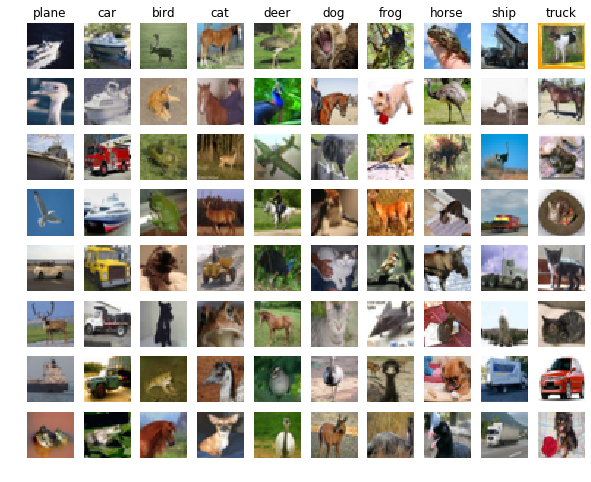

In [19]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$ A fraction of the missclassifications are images that are very difficult to classify even with the human eye. Also, highly similar classes (car and truck, cats, dogs, and horses, ship and truck) are more likely to get confused (which is good, it means the algorithm is working just not perfectly). 




## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [42]:
# Preprocessing: Remove the bias dimension

X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train,X_val, X_test,
                                                                          num_color_bins=50)

print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [85]:
# Ploting function for the loss function and train / validation accuracies
def plot_stats(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.legend()
    plt.show()

In [67]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [1e-1, 1]
learning_rate_decays = [0.98]
hidden_sizes = [50,500]
batch_sizes = [200]
regs = [0.1]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=True)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 1000: loss 2.302595
iteration 100 / 1000: loss 2.302873
iteration 200 / 1000: loss 2.302019
iteration 300 / 1000: loss 2.298189
iteration 400 / 1000: loss 2.250705
iteration 500 / 1000: loss 2.253038
iteration 600 / 1000: loss 2.211936
iteration 700 / 1000: loss 2.151403
iteration 800 / 1000: loss 2.127074
iteration 900 / 1000: loss 2.201501
lr: 0.1 lrd: 0.98 hs: 50 bs: 200 reg: 0.1 val: 0.30
iteration 0 / 1000: loss 2.302687
iteration 100 / 1000: loss 2.302403
iteration 200 / 1000: loss 2.303133
iteration 300 / 1000: loss 2.255727
iteration 400 / 1000: loss 2.260172
iteration 500 / 1000: loss 2.225967
iteration 600 / 1000: loss 2.227224
iteration 700 / 1000: loss 2.183769
iteration 800 / 1000: loss 2.130119
iteration 900 / 1000: loss 2.152577
lr: 0.1 lrd: 0.98 hs: 500 bs: 200 reg: 0.1 val: 0.31
iteration 0 / 1000: loss 2.302595
iteration 100 / 1000: loss 2.129317
iteration 200 / 1000: loss 2.138625
iteration 300 / 1000: loss 2.222499
iteration 400 / 1000: loss 2.155067
i

In [68]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2            1.0            0.98           50         200             0.1   
3            1.0            0.98          500         200             0.1   
0            0.1            0.98           50         200             0.1   
1            0.1            0.98          500         200             0.1   

   val_acc                                              stats  
2    0.265  {'loss_history': [2.302595317544204, 2.3002259...  
3    0.300  {'loss_history': [2.3026867456493494, 2.304319...  
0    0.302  {'loss_history': [2.3025950853669728, 2.302703...  
1    0.314  {'loss_history': [2.302687235403392, 2.3027764...

learning_rate                                                 0.100
learning_decay                                                0.980
hidden_size                                                      50
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.302
stats             {'loss_history': [2.3025950853669728, 2.302703...
Name: 0, dtype: object


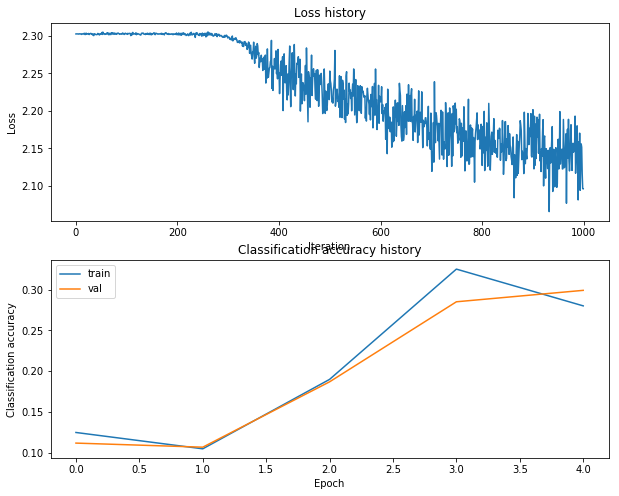

learning_rate                                                 0.100
learning_decay                                                0.980
hidden_size                                                     500
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.314
stats             {'loss_history': [2.302687235403392, 2.3027764...
Name: 1, dtype: object


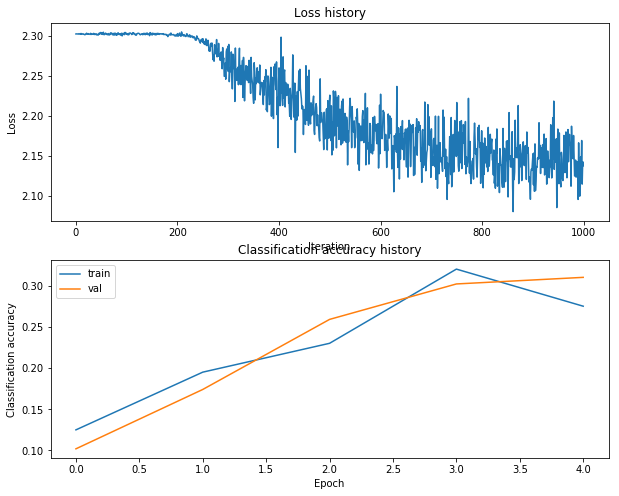

learning_rate                                                 1.000
learning_decay                                                0.980
hidden_size                                                      50
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.265
stats             {'loss_history': [2.302595317544204, 2.3002259...
Name: 2, dtype: object


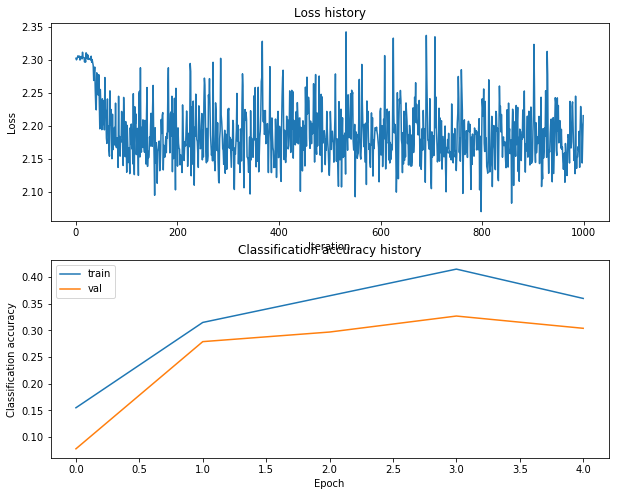

learning_rate                                                  1.00
learning_decay                                                 0.98
hidden_size                                                     500
batch_size                                                      200
regularization                                                 0.10
val_acc                                                        0.30
stats             {'loss_history': [2.3026867456493494, 2.304319...
Name: 3, dtype: object


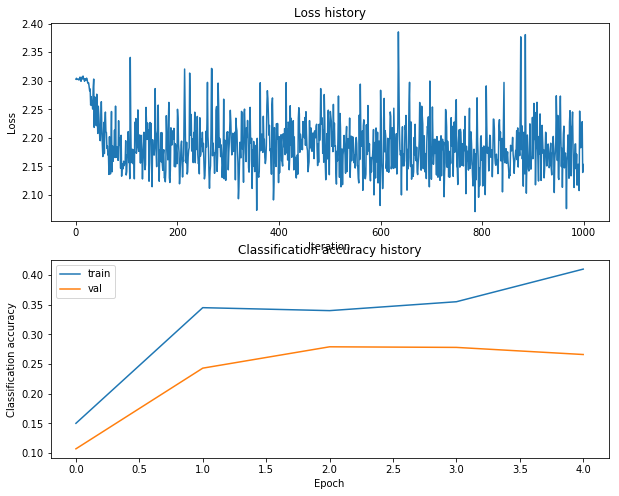

In [84]:
for index, row in df.iterrows():
    print(row)
    plot_stats(row['stats'])

Low learning rates -> train accuracy = validation accuracy 

High learning rates -> train accuracy > validation accuracy, worse validation performance

=> learning rates lead to low 

Appears that larger hidden sizes are better

In [99]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [1e-1, 3e-1]
learning_rate_decays = [0.98, 0.95]
hidden_sizes = [100]
batch_sizes = [200]
regs = [0.1, 0.4]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 1000: loss 2.302605
iteration 100 / 1000: loss 2.301335
iteration 200 / 1000: loss 2.301004
iteration 300 / 1000: loss 2.290279
iteration 400 / 1000: loss 2.257413
iteration 500 / 1000: loss 2.221581
iteration 600 / 1000: loss 2.216992
iteration 700 / 1000: loss 2.153861
iteration 800 / 1000: loss 2.167446
iteration 900 / 1000: loss 2.173087
lr: 0.1 lrd: 0.98 hs: 100 bs: 200 reg: 0.1 val: 0.32
iteration 0 / 1000: loss 2.302666
iteration 100 / 1000: loss 2.302985
iteration 200 / 1000: loss 2.302676
iteration 300 / 1000: loss 2.300832
iteration 400 / 1000: loss 2.302033
iteration 500 / 1000: loss 2.301863
iteration 600 / 1000: loss 2.302428
iteration 700 / 1000: loss 2.304239
iteration 800 / 1000: loss 2.303061
iteration 900 / 1000: loss 2.302611
lr: 0.1 lrd: 0.98 hs: 100 bs: 200 reg: 0.4 val: 0.08
iteration 0 / 1000: loss 2.302606
iteration 100 / 1000: loss 2.304122
iteration 200 / 1000: loss 2.302686
iteration 300 / 1000: loss 2.291998
iteration 400 / 1000: loss 2.256358


In [102]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
1            0.1            0.98          100         200             0.4   
5            0.3            0.98          100         200             0.4   
7            0.3            0.95          100         200             0.4   
3            0.1            0.95          100         200             0.4   
2            0.1            0.95          100         200             0.1   
0            0.1            0.98          100         200             0.1   
4            0.3            0.98          100         200             0.1   
6            0.3            0.95          100         200             0.1   

   val_acc                                              stats  
1    0.079  {'loss_history': [2.3026655979530646, 2.302813...  
5    0.087  {'loss_history': [2.302666456598338, 2.3025106...  
7    0.087  {'loss_history': [2.3026671611967027, 2.302598...  
3    0.098  {'loss_history': [2.3026655905103515, 2.302886...  
2    0.287  {'loss_history': [2.3026055950966895, 2.302771...  
0    0.322  {'loss_history': [2.3026052732315225, 2.302561...  
4    0.339  {'loss_history': [2.3026057252540246, 2.302748...  
6    0.348  {'loss_history': [2.302605446042617, 2.3027843...

learning_rate                                                 0.100
learning_decay                                                0.980
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.400
val_acc                                                       0.079
stats             {'loss_history': [2.3026655979530646, 2.302813...
Name: 1, dtype: object


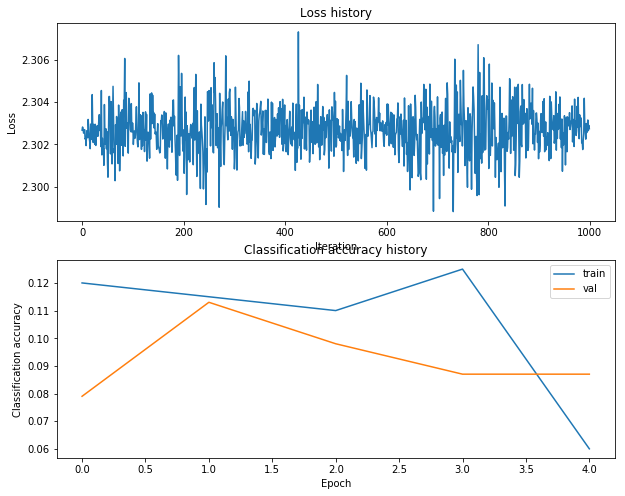

learning_rate                                                 0.300
learning_decay                                                0.980
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.400
val_acc                                                       0.087
stats             {'loss_history': [2.302666456598338, 2.3025106...
Name: 5, dtype: object


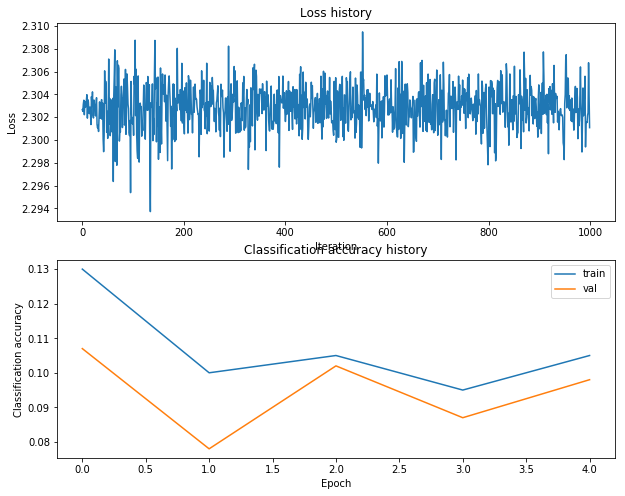

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.400
val_acc                                                       0.087
stats             {'loss_history': [2.3026671611967027, 2.302598...
Name: 7, dtype: object


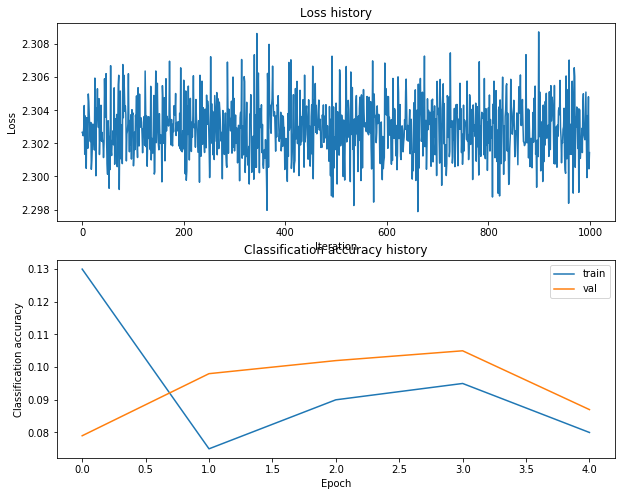

learning_rate                                                 0.100
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.400
val_acc                                                       0.098
stats             {'loss_history': [2.3026655905103515, 2.302886...
Name: 3, dtype: object


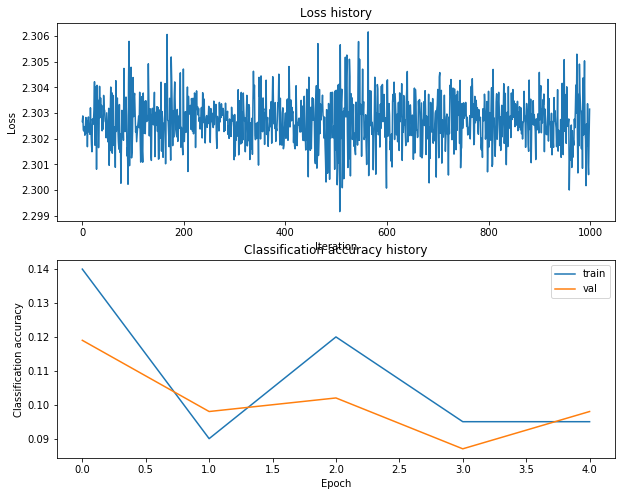

learning_rate                                                 0.100
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.287
stats             {'loss_history': [2.3026055950966895, 2.302771...
Name: 2, dtype: object


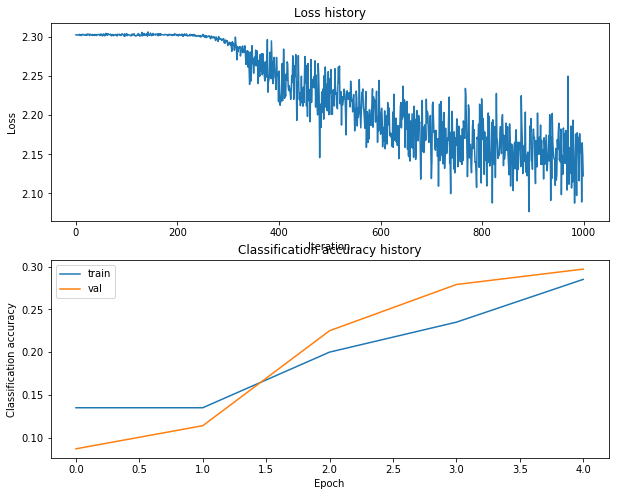

learning_rate                                                 0.100
learning_decay                                                0.980
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.322
stats             {'loss_history': [2.3026052732315225, 2.302561...
Name: 0, dtype: object


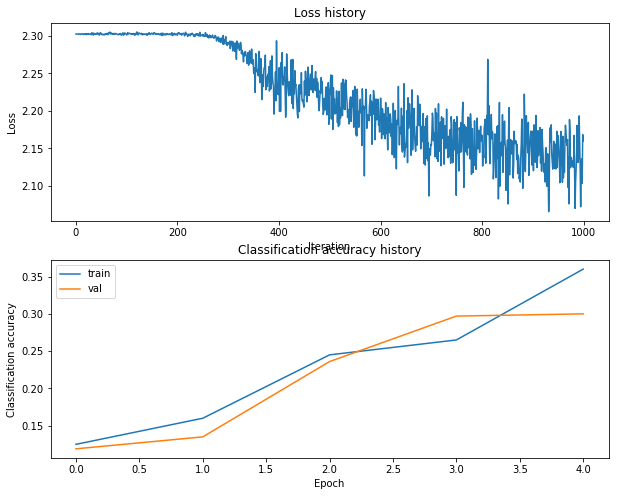

learning_rate                                                 0.300
learning_decay                                                0.980
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.339
stats             {'loss_history': [2.3026057252540246, 2.302748...
Name: 4, dtype: object


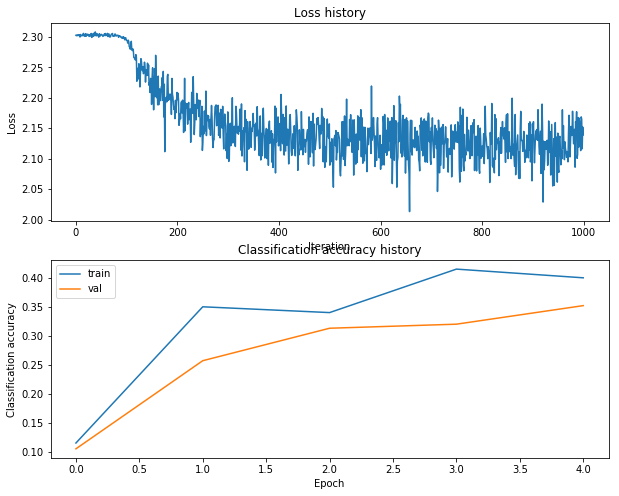

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.348
stats             {'loss_history': [2.302605446042617, 2.3027843...
Name: 6, dtype: object


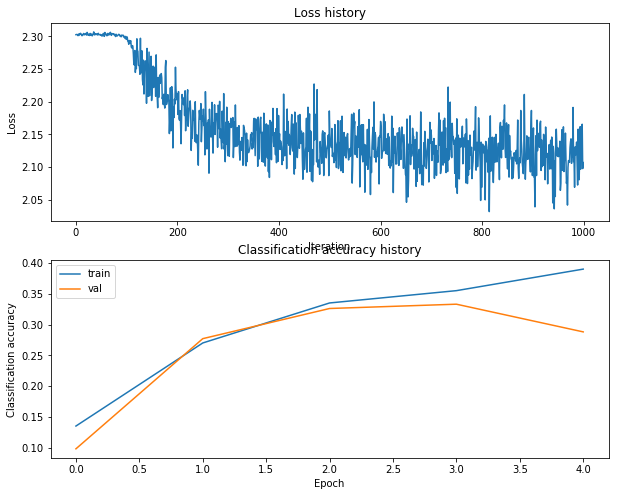

In [103]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Too-high regularization leads to very little learning on training set. 

In [131]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [3e-1]
learning_rate_decays = [0.95]
hidden_sizes = [100]
batch_sizes = [200]
regs = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, .5]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 1e-08 val: 0.55
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 1e-07 val: 0.56
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 1e-06 val: 0.56
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 1e-05 val: 0.58
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 0.0001 val: 0.57
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 0.001 val: 0.56
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 0.01 val: 0.51
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 0.1 val: 0.34
lr: 0.3 lrd: 0.95 hs: 100 bs: 200 reg: 0.5 val: 0.08


In [132]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
8            0.3            0.95          100         200    5.000000e-01   
7            0.3            0.95          100         200    1.000000e-01   
6            0.3            0.95          100         200    1.000000e-02   
0            0.3            0.95          100         200    1.000000e-08   
2            0.3            0.95          100         200    1.000000e-06   
1            0.3            0.95          100         200    1.000000e-07   
5            0.3            0.95          100         200    1.000000e-03   
4            0.3            0.95          100         200    1.000000e-04   
3            0.3            0.95          100         200    1.000000e-05   

   val_acc                                              stats  
8    0.079  {'loss_history': [2.3026846803247607, 2.303467...  
7    0.336  {'loss_history': [2.3026053018057278, 2.302961...  
6    0.514  {'loss_history': [2.302587157706187, 2.3022093...  
0    0.551  {'loss_history': [2.3025852996342935, 2.302142...  
2    0.557  {'loss_history': [2.3025852740613164, 2.301414...  
1    0.559  {'loss_history': [2.3025851498443046, 2.302603...  
5    0.562  {'loss_history': [2.302585374152839, 2.3025730...  
4    0.567  {'loss_history': [2.302584995637958, 2.3027381...  
3    0.578  {'loss_history': [2.3025850808660024, 2.302583...

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.500
val_acc                                                       0.079
stats             {'loss_history': [2.3026846803247607, 2.303467...
Name: 8, dtype: object


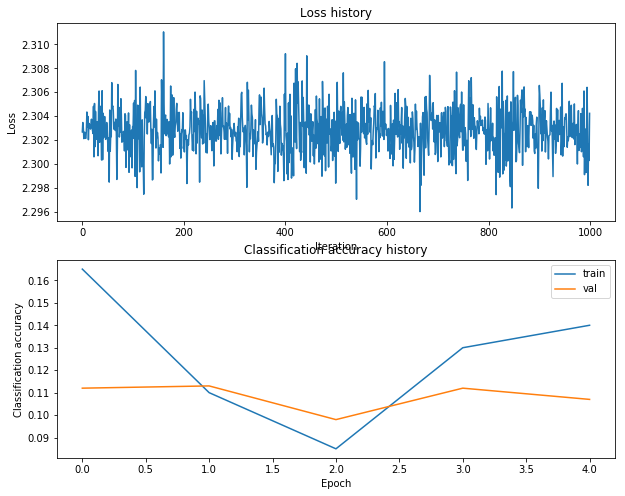

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.100
val_acc                                                       0.336
stats             {'loss_history': [2.3026053018057278, 2.302961...
Name: 7, dtype: object


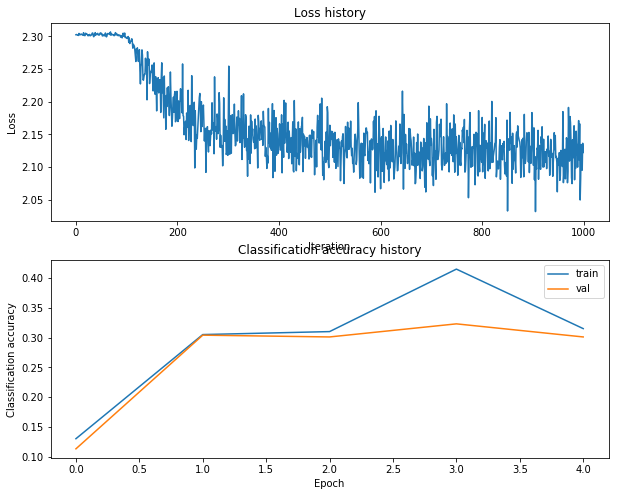

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.010
val_acc                                                       0.514
stats             {'loss_history': [2.302587157706187, 2.3022093...
Name: 6, dtype: object


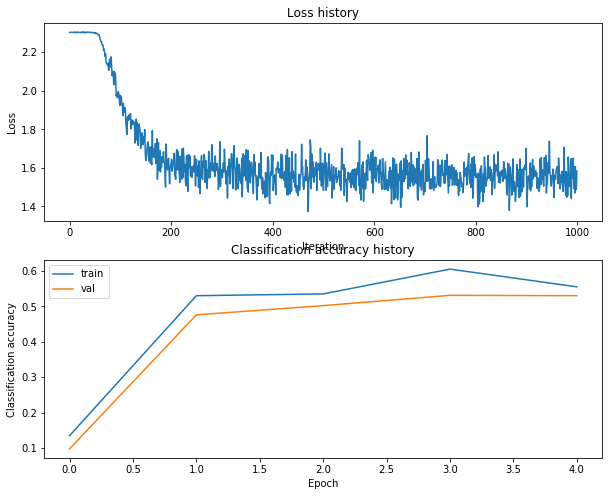

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.000
val_acc                                                       0.551
stats             {'loss_history': [2.3025852996342935, 2.302142...
Name: 0, dtype: object


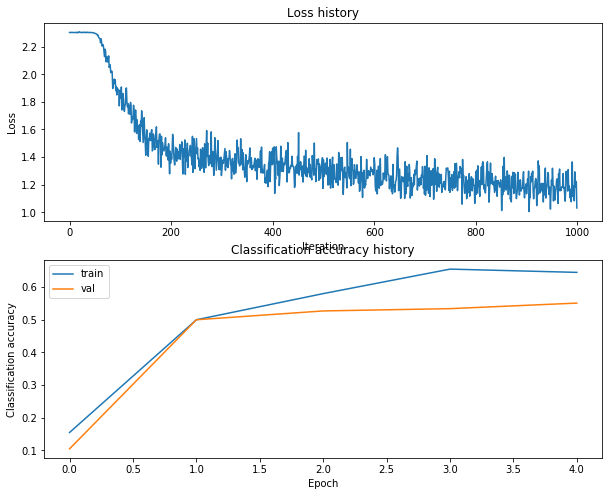

learning_rate                                              0.300000
learning_decay                                             0.950000
hidden_size                                                     100
batch_size                                                      200
regularization                                             0.000001
val_acc                                                    0.557000
stats             {'loss_history': [2.3025852740613164, 2.301414...
Name: 2, dtype: object


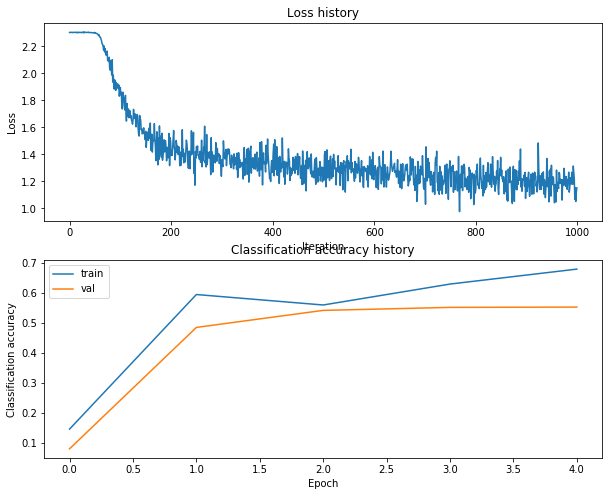

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.000
val_acc                                                       0.559
stats             {'loss_history': [2.3025851498443046, 2.302603...
Name: 1, dtype: object


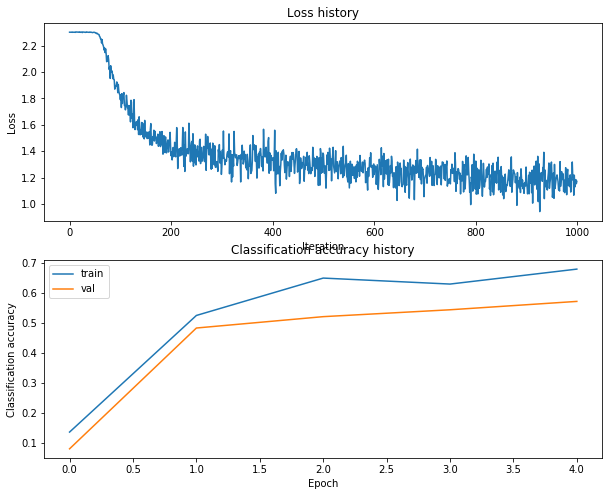

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     100
batch_size                                                      200
regularization                                                0.001
val_acc                                                       0.562
stats             {'loss_history': [2.302585374152839, 2.3025730...
Name: 5, dtype: object


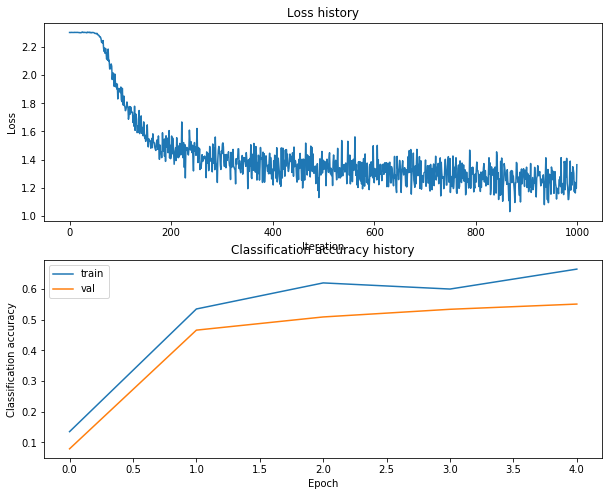

learning_rate                                                0.3000
learning_decay                                               0.9500
hidden_size                                                     100
batch_size                                                      200
regularization                                               0.0001
val_acc                                                      0.5670
stats             {'loss_history': [2.302584995637958, 2.3027381...
Name: 4, dtype: object


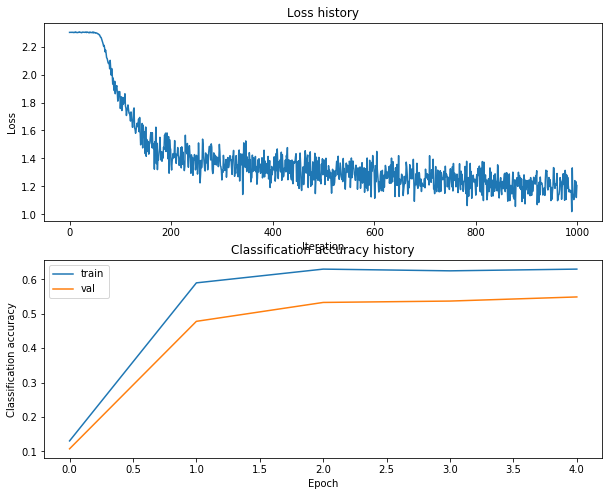

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     100
batch_size                                                      200
regularization                                              0.00001
val_acc                                                     0.57800
stats             {'loss_history': [2.3025850808660024, 2.302583...
Name: 3, dtype: object


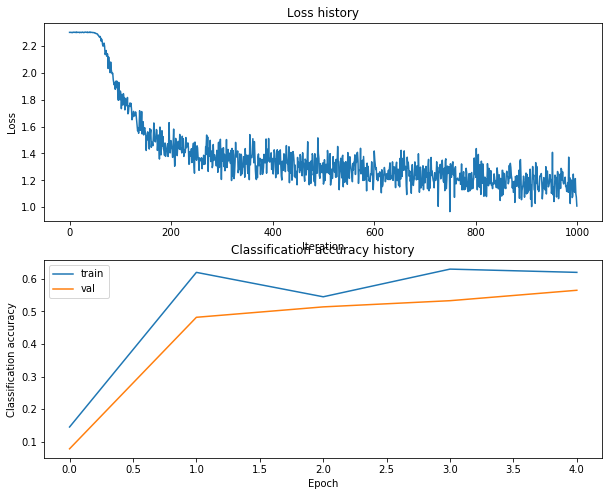

In [133]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

From multiple runs, any regularization below 1e-2 works fine.

In [138]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [3e-1]
learning_rate_decays = [0.95]
hidden_sizes = [50, 150, 500, 1500]
batch_sizes = [200]
regs = [1e-8, 1e-5, 1e-3]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 0.3 lrd: 0.95 hs: 50 bs: 200 reg: 1e-08 val: 0.55
lr: 0.3 lrd: 0.95 hs: 50 bs: 200 reg: 1e-05 val: 0.54
lr: 0.3 lrd: 0.95 hs: 50 bs: 200 reg: 0.001 val: 0.54
lr: 0.3 lrd: 0.95 hs: 150 bs: 200 reg: 1e-08 val: 0.57
lr: 0.3 lrd: 0.95 hs: 150 bs: 200 reg: 1e-05 val: 0.58
lr: 0.3 lrd: 0.95 hs: 150 bs: 200 reg: 0.001 val: 0.55
lr: 0.3 lrd: 0.95 hs: 500 bs: 200 reg: 1e-08 val: 0.57
lr: 0.3 lrd: 0.95 hs: 500 bs: 200 reg: 1e-05 val: 0.58
lr: 0.3 lrd: 0.95 hs: 500 bs: 200 reg: 0.001 val: 0.56
lr: 0.3 lrd: 0.95 hs: 1500 bs: 200 reg: 1e-08 val: 0.57
lr: 0.3 lrd: 0.95 hs: 1500 bs: 200 reg: 1e-05 val: 0.58
lr: 0.3 lrd: 0.95 hs: 1500 bs: 200 reg: 0.001 val: 0.57


In [139]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2             0.3            0.95           50         200    1.000000e-03   
1             0.3            0.95           50         200    1.000000e-05   
5             0.3            0.95          150         200    1.000000e-03   
0             0.3            0.95           50         200    1.000000e-08   
8             0.3            0.95          500         200    1.000000e-03   
6             0.3            0.95          500         200    1.000000e-08   
11            0.3            0.95         1500         200    1.000000e-03   
3             0.3            0.95          150         200    1.000000e-08   
9             0.3            0.95         1500         200    1.000000e-08   
4             0.3            0.95          150         200    1.000000e-05   
10            0.3            0.95         1500         200    1.000000e-05   
7             0.3            0.95          500         200    1.000000e-05   

    val_acc                                              stats  
2     0.537  {'loss_history': [2.3025852452536655, 2.302462...  
1     0.544  {'loss_history': [2.3025851942427327, 2.302166...  
5     0.548  {'loss_history': [2.3025855233365706, 2.302721...  
0     0.552  {'loss_history': [2.302585087598445, 2.3032092...  
8     0.558  {'loss_history': [2.302586033474408, 2.3023249...  
6     0.567  {'loss_history': [2.3025850486735675, 2.302107...  
11    0.567  {'loss_history': [2.302587888353907, 2.3034442...  
3     0.574  {'loss_history': [2.3025850425991274, 2.302849...  
9     0.575  {'loss_history': [2.302585240415711, 2.3021258...  
4     0.577  {'loss_history': [2.302585343009741, 2.3029396...  
10    0.577  {'loss_history': [2.302585461622892, 2.3024531...  
7     0.580  {'loss_history': [2.30258527258748, 2.30202919...

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                      50
batch_size                                                      200
regularization                                                0.001
val_acc                                                       0.537
stats             {'loss_history': [2.3025852452536655, 2.302462...
Name: 2, dtype: object


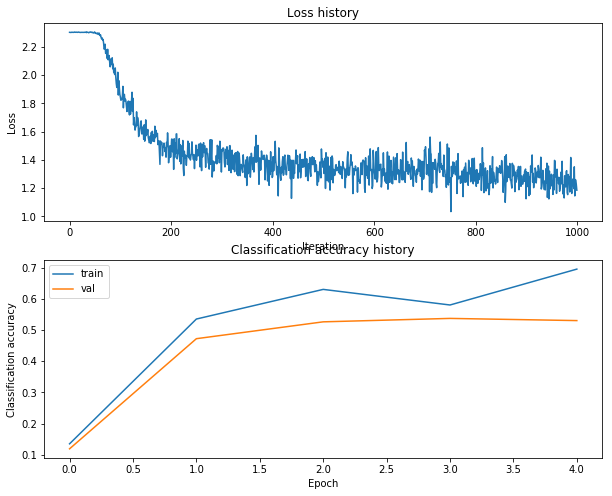

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                      50
batch_size                                                      200
regularization                                              0.00001
val_acc                                                     0.54400
stats             {'loss_history': [2.3025851942427327, 2.302166...
Name: 1, dtype: object


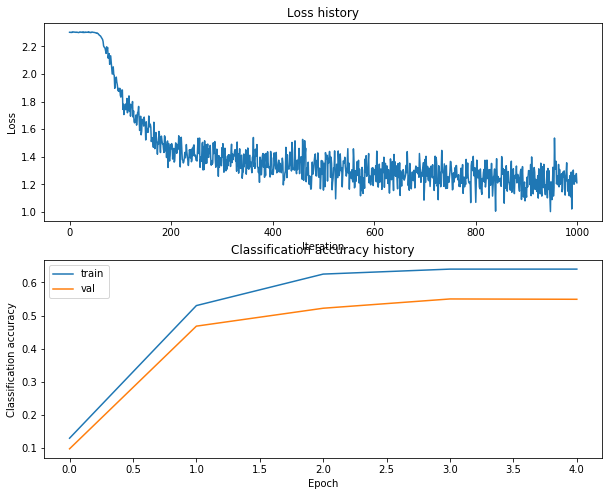

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     150
batch_size                                                      200
regularization                                                0.001
val_acc                                                       0.548
stats             {'loss_history': [2.3025855233365706, 2.302721...
Name: 5, dtype: object


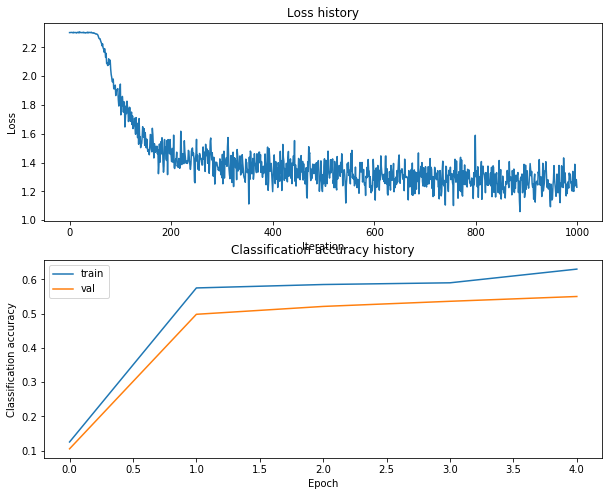

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                      50
batch_size                                                      200
regularization                                                0.000
val_acc                                                       0.552
stats             {'loss_history': [2.302585087598445, 2.3032092...
Name: 0, dtype: object


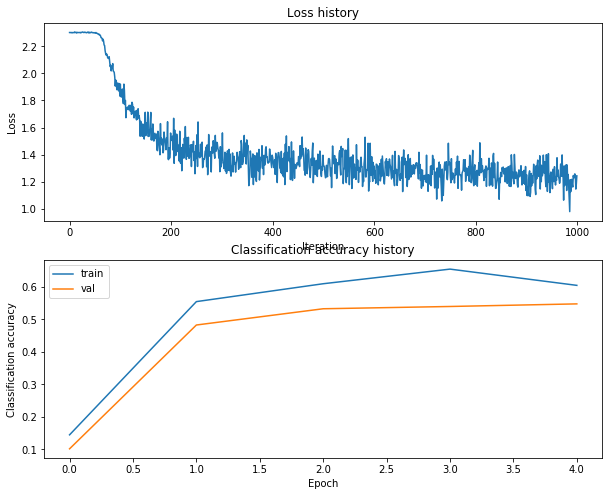

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     500
batch_size                                                      200
regularization                                                0.001
val_acc                                                       0.558
stats             {'loss_history': [2.302586033474408, 2.3023249...
Name: 8, dtype: object


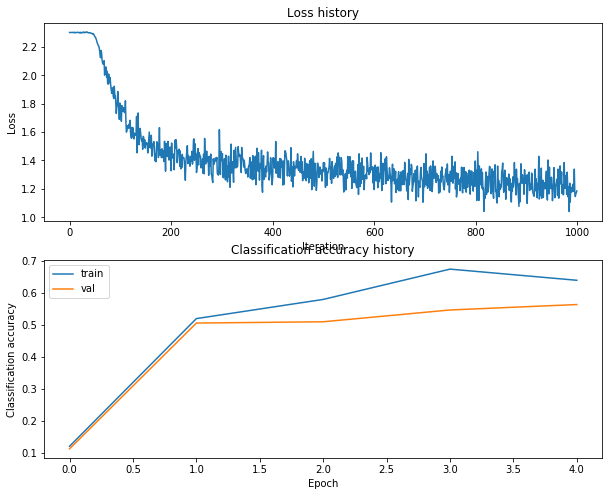

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     500
batch_size                                                      200
regularization                                                0.000
val_acc                                                       0.567
stats             {'loss_history': [2.3025850486735675, 2.302107...
Name: 6, dtype: object


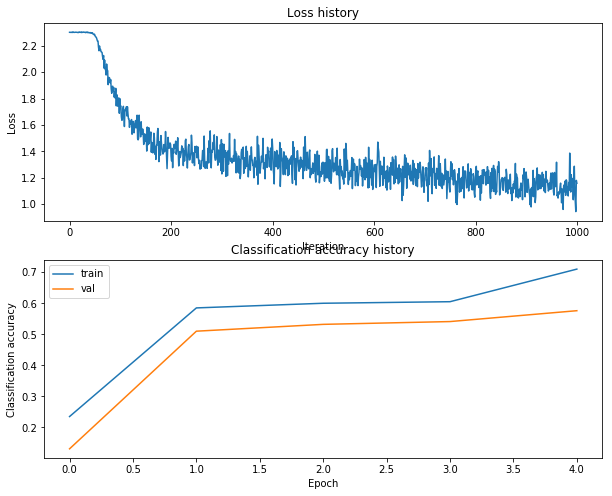

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                    1500
batch_size                                                      200
regularization                                                0.001
val_acc                                                       0.567
stats             {'loss_history': [2.302587888353907, 2.3034442...
Name: 11, dtype: object


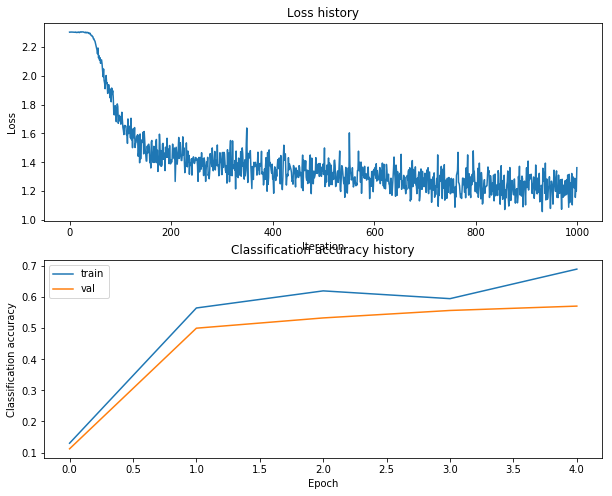

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                     150
batch_size                                                      200
regularization                                                0.000
val_acc                                                       0.574
stats             {'loss_history': [2.3025850425991274, 2.302849...
Name: 3, dtype: object


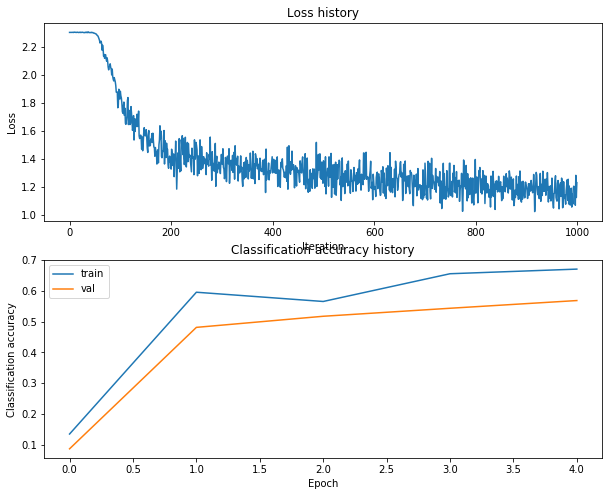

learning_rate                                                 0.300
learning_decay                                                0.950
hidden_size                                                    1500
batch_size                                                      200
regularization                                                0.000
val_acc                                                       0.575
stats             {'loss_history': [2.302585240415711, 2.3021258...
Name: 9, dtype: object


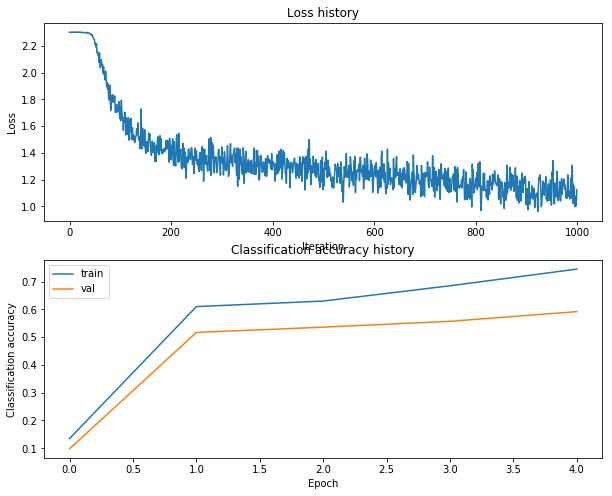

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     150
batch_size                                                      200
regularization                                              0.00001
val_acc                                                     0.57700
stats             {'loss_history': [2.302585343009741, 2.3029396...
Name: 4, dtype: object


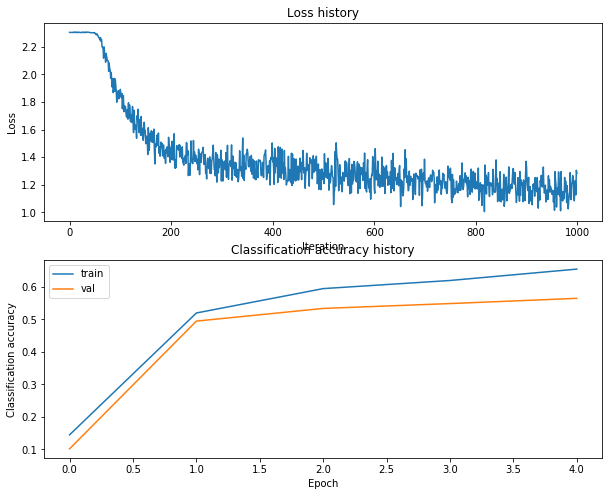

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                    1500
batch_size                                                      200
regularization                                              0.00001
val_acc                                                     0.57700
stats             {'loss_history': [2.302585461622892, 2.3024531...
Name: 10, dtype: object


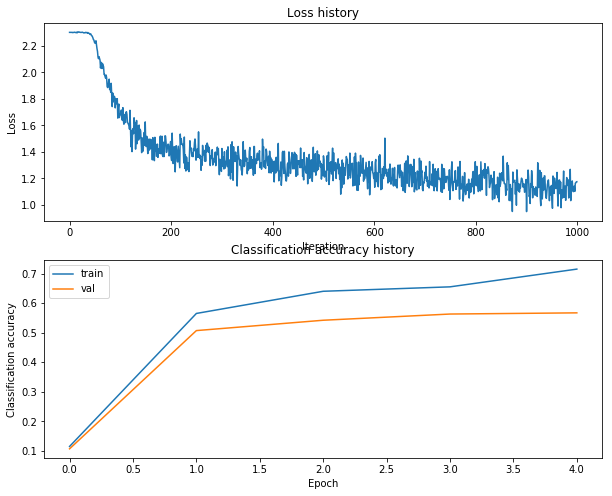

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     500
batch_size                                                      200
regularization                                              0.00001
val_acc                                                     0.58000
stats             {'loss_history': [2.30258527258748, 2.30202919...
Name: 7, dtype: object


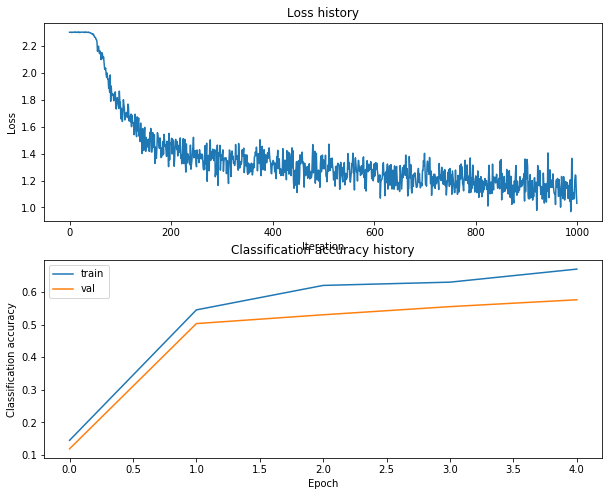

In [140]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Hidden size of $50$ is not great. $150$ seems to be on the cusp, better than $50$ not as good as larger. Definitely no improvement above $500$. Larger regularization ($1^{-3}$) probably not as good as smaller ($1^{-5} - 1^{-8}$). 

In [144]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [3e-1]
learning_rate_decays = [0.95]
hidden_sizes = [250, 500]
batch_sizes = [10, 100, 300, 1000]
regs = [1e-5]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 0.3 lrd: 0.95 hs: 250 bs: 10 reg: 1e-05 val: 0.35
lr: 0.3 lrd: 0.95 hs: 250 bs: 100 reg: 1e-05 val: 0.57
lr: 0.3 lrd: 0.95 hs: 250 bs: 300 reg: 1e-05 val: 0.57
lr: 0.3 lrd: 0.95 hs: 250 bs: 1000 reg: 1e-05 val: 0.53
lr: 0.3 lrd: 0.95 hs: 500 bs: 10 reg: 1e-05 val: 0.35
lr: 0.3 lrd: 0.95 hs: 500 bs: 100 reg: 1e-05 val: 0.56
lr: 0.3 lrd: 0.95 hs: 500 bs: 300 reg: 1e-05 val: 0.58
lr: 0.3 lrd: 0.95 hs: 500 bs: 1000 reg: 1e-05 val: 0.54


In [145]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
0            0.3            0.95          250          10         0.00001   
4            0.3            0.95          500          10         0.00001   
3            0.3            0.95          250        1000         0.00001   
7            0.3            0.95          500        1000         0.00001   
5            0.3            0.95          500         100         0.00001   
1            0.3            0.95          250         100         0.00001   
2            0.3            0.95          250         300         0.00001   
6            0.3            0.95          500         300         0.00001   

   val_acc                                              stats  
0    0.352  {'loss_history': [2.3025847696292447, 2.312226...  
4    0.354  {'loss_history': [2.3025844582573107, 2.296763...  
3    0.534  {'loss_history': [2.302585022314623, 2.3026402...  
7    0.538  {'loss_history': [2.3025850745422893, 2.302481...  
5    0.565  {'loss_history': [2.3025850164240165, 2.302249...  
1    0.567  {'loss_history': [2.302585010295215, 2.3038693...  
2    0.574  {'loss_history': [2.3025849296771748, 2.302731...  
6    0.581  {'loss_history': [2.302585024793054, 2.3028487...

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                       10
regularization                                              0.00001
val_acc                                                     0.35200
stats             {'loss_history': [2.3025847696292447, 2.312226...
Name: 0, dtype: object


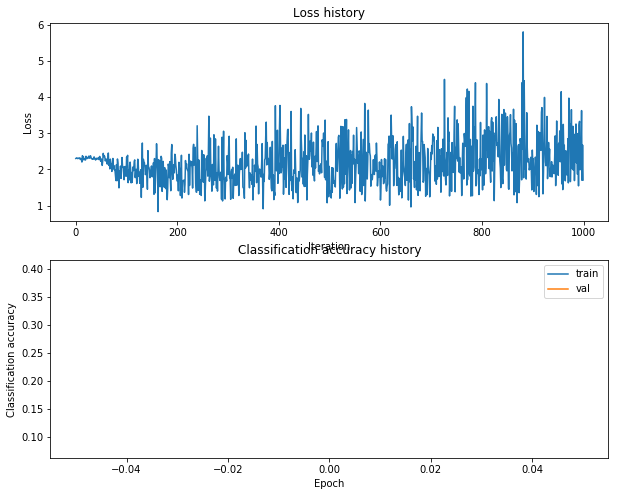

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     500
batch_size                                                       10
regularization                                              0.00001
val_acc                                                     0.35400
stats             {'loss_history': [2.3025844582573107, 2.296763...
Name: 4, dtype: object


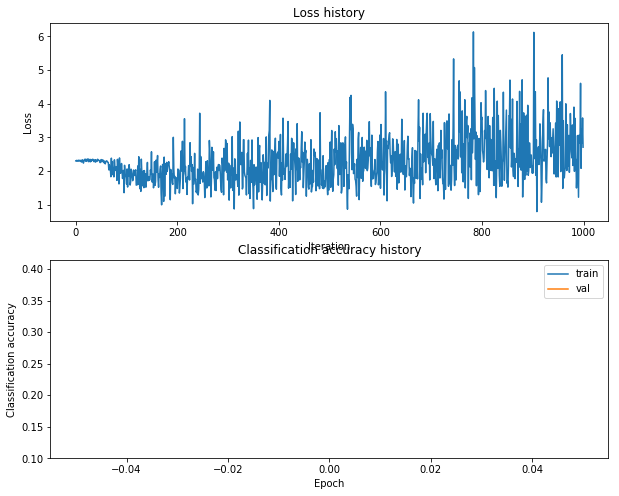

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                     1000
regularization                                              0.00001
val_acc                                                     0.53400
stats             {'loss_history': [2.302585022314623, 2.3026402...
Name: 3, dtype: object


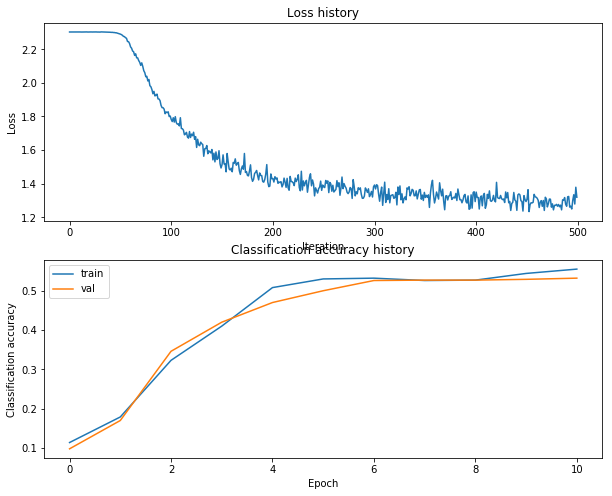

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     500
batch_size                                                     1000
regularization                                              0.00001
val_acc                                                     0.53800
stats             {'loss_history': [2.3025850745422893, 2.302481...
Name: 7, dtype: object


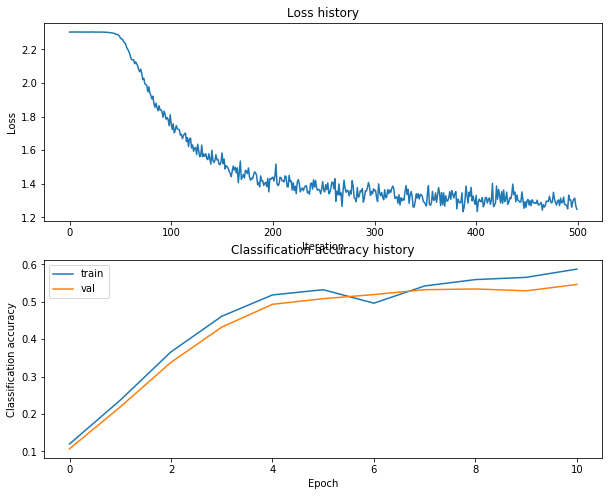

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     500
batch_size                                                      100
regularization                                              0.00001
val_acc                                                     0.56500
stats             {'loss_history': [2.3025850164240165, 2.302249...
Name: 5, dtype: object


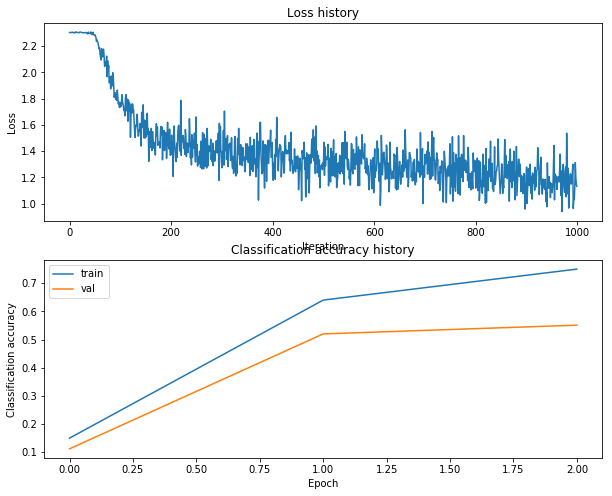

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      100
regularization                                              0.00001
val_acc                                                     0.56700
stats             {'loss_history': [2.302585010295215, 2.3038693...
Name: 1, dtype: object


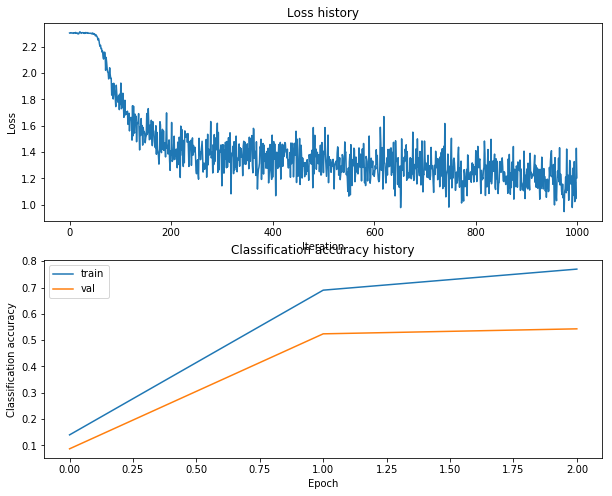

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      300
regularization                                              0.00001
val_acc                                                     0.57400
stats             {'loss_history': [2.3025849296771748, 2.302731...
Name: 2, dtype: object


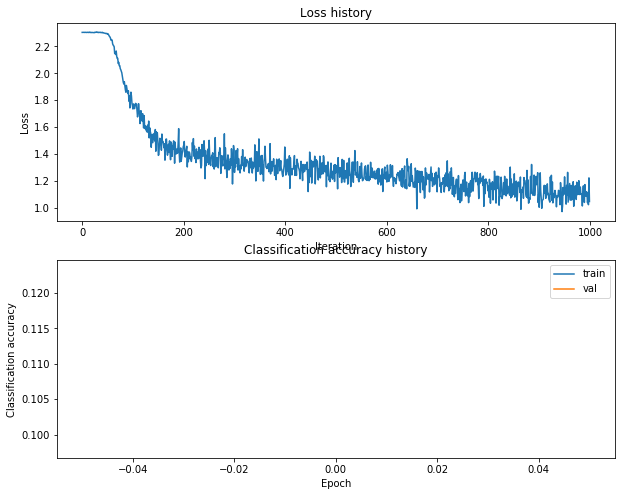

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     500
batch_size                                                      300
regularization                                              0.00001
val_acc                                                     0.58100
stats             {'loss_history': [2.302585024793054, 2.3028487...
Name: 6, dtype: object


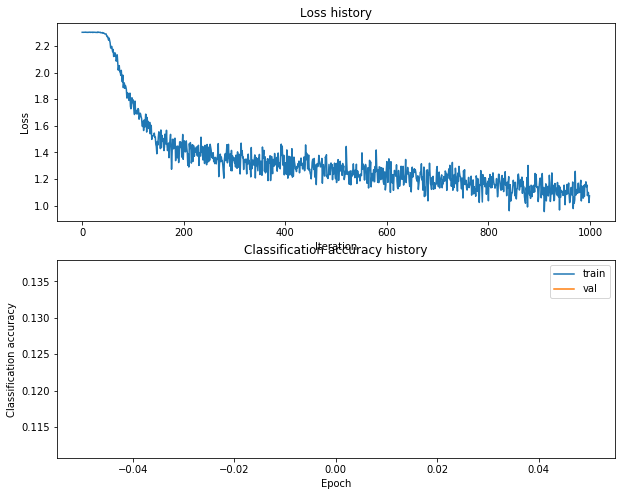

In [146]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Probably no difference between hidden size of 250 and 500. Too-small batch size is bad ($10$), too large actually degrades performance a *bit* and it is computationally more expensive. Stick with a medium batch size of $250$.

I'm curious about larger learning rates with stronger decays.

In [155]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [3e-1, 7e-1, 1.5]
learning_rate_decays = [0.95, 0.8, 0.5]
hidden_sizes = [250]
batch_sizes = [250]
regs = [1e-5]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 0.3 lrd: 0.95 hs: 250 bs: 250 reg: 1e-05 val: 0.56
lr: 0.3 lrd: 0.8 hs: 250 bs: 250 reg: 1e-05 val: 0.55
lr: 0.3 lrd: 0.5 hs: 250 bs: 250 reg: 1e-05 val: 0.50
lr: 0.7 lrd: 0.95 hs: 250 bs: 250 reg: 1e-05 val: 0.58
lr: 0.7 lrd: 0.8 hs: 250 bs: 250 reg: 1e-05 val: 0.58
lr: 0.7 lrd: 0.5 hs: 250 bs: 250 reg: 1e-05 val: 0.55
lr: 1.5 lrd: 0.95 hs: 250 bs: 250 reg: 1e-05 val: 0.54
lr: 1.5 lrd: 0.8 hs: 250 bs: 250 reg: 1e-05 val: 0.58
lr: 1.5 lrd: 0.5 hs: 250 bs: 250 reg: 1e-05 val: 0.59


In [156]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2            0.3            0.50          250         250         0.00001   
6            1.5            0.95          250         250         0.00001   
5            0.7            0.50          250         250         0.00001   
1            0.3            0.80          250         250         0.00001   
0            0.3            0.95          250         250         0.00001   
3            0.7            0.95          250         250         0.00001   
7            1.5            0.80          250         250         0.00001   
4            0.7            0.80          250         250         0.00001   
8            1.5            0.50          250         250         0.00001   

   val_acc                                              stats  
2    0.500  {'loss_history': [2.302585217358972, 2.3029306...  
6    0.539  {'loss_history': [2.302585025389704, 2.3059829...  
5    0.548  {'loss_history': [2.3025851456176794, 2.301993...  
1    0.549  {'loss_history': [2.3025849324725343, 2.302460...  
0    0.564  {'loss_history': [2.3025849616953713, 2.301916...  
3    0.582  {'loss_history': [2.3025849444087108, 2.301411...  
7    0.583  {'loss_history': [2.302584989831704, 2.3050663...  
4    0.585  {'loss_history': [2.3025849603112825, 2.303726...  
8    0.586  {'loss_history': [2.302585009159749, 2.3036499...

learning_rate                                               0.30000
learning_decay                                              0.50000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.50000
stats             {'loss_history': [2.302585217358972, 2.3029306...
Name: 2, dtype: object


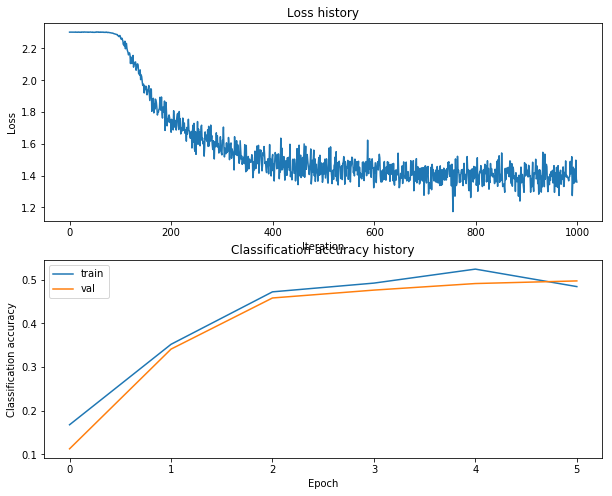

learning_rate                                               1.50000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.53900
stats             {'loss_history': [2.302585025389704, 2.3059829...
Name: 6, dtype: object


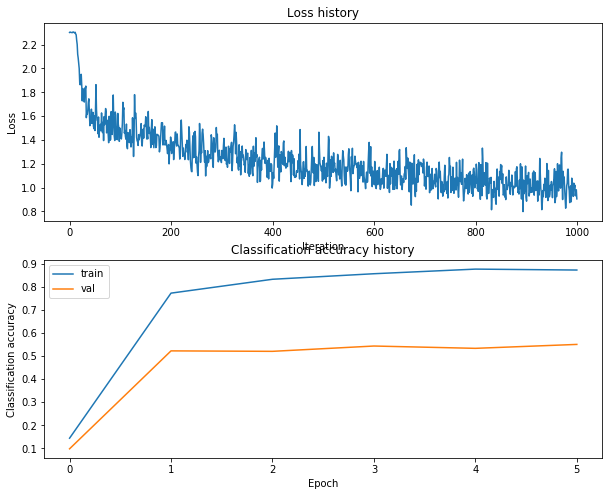

learning_rate                                               0.70000
learning_decay                                              0.50000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.54800
stats             {'loss_history': [2.3025851456176794, 2.301993...
Name: 5, dtype: object


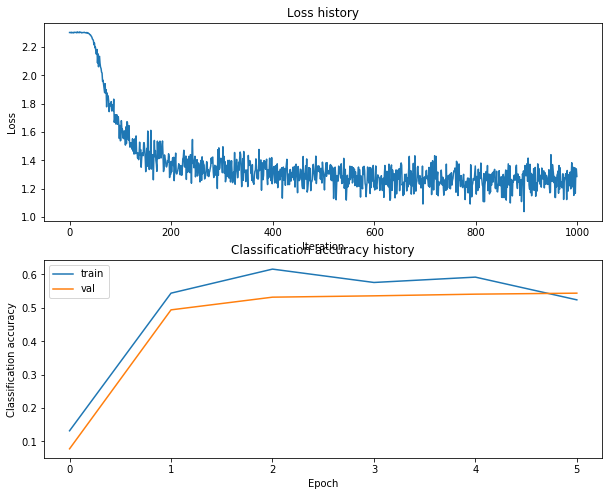

learning_rate                                               0.30000
learning_decay                                              0.80000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.54900
stats             {'loss_history': [2.3025849324725343, 2.302460...
Name: 1, dtype: object


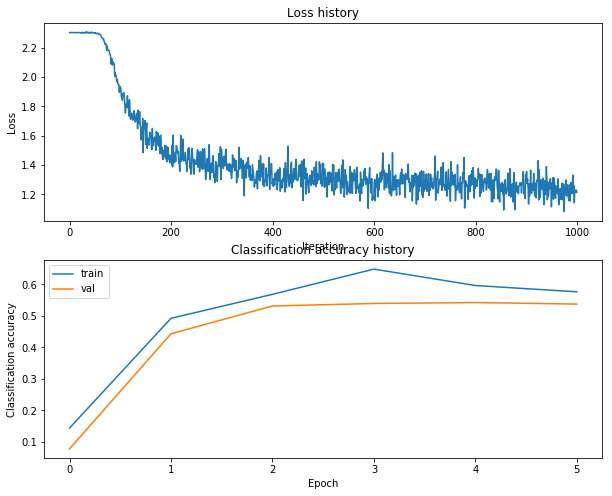

learning_rate                                               0.30000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.56400
stats             {'loss_history': [2.3025849616953713, 2.301916...
Name: 0, dtype: object


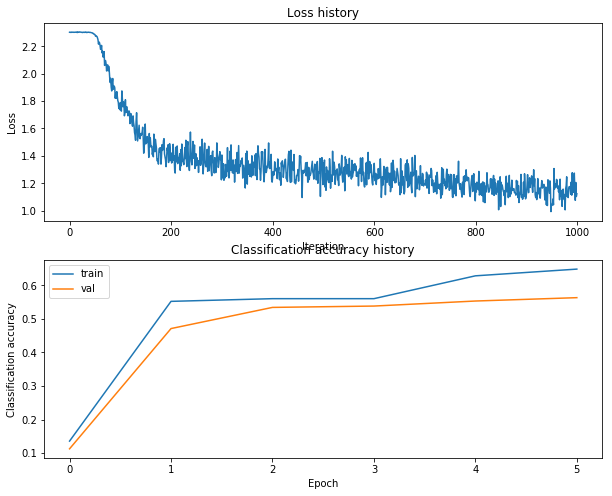

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.58200
stats             {'loss_history': [2.3025849444087108, 2.301411...
Name: 3, dtype: object


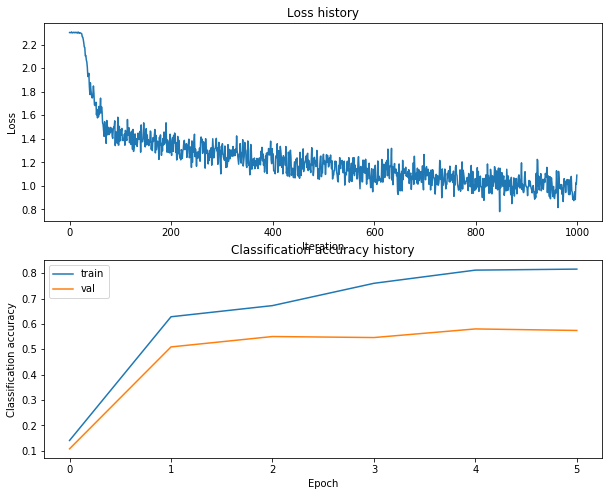

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.58300
stats             {'loss_history': [2.302584989831704, 2.3050663...
Name: 7, dtype: object


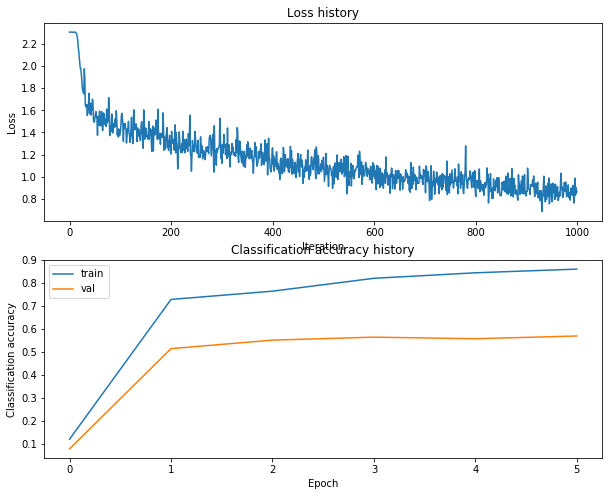

learning_rate                                               0.70000
learning_decay                                              0.80000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.58500
stats             {'loss_history': [2.3025849603112825, 2.303726...
Name: 4, dtype: object


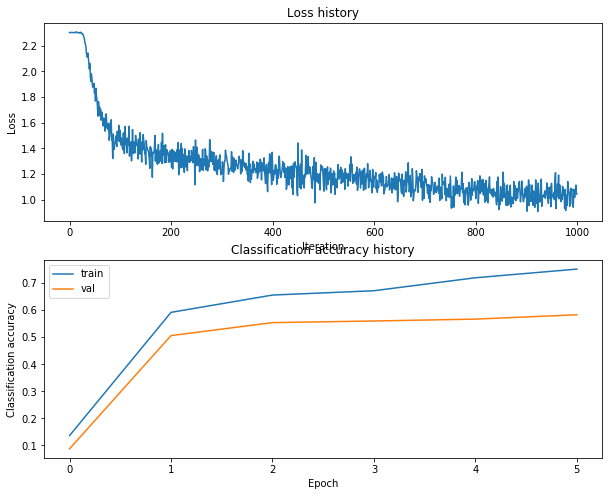

learning_rate                                               1.50000
learning_decay                                              0.50000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.58600
stats             {'loss_history': [2.302585009159749, 2.3036499...
Name: 8, dtype: object


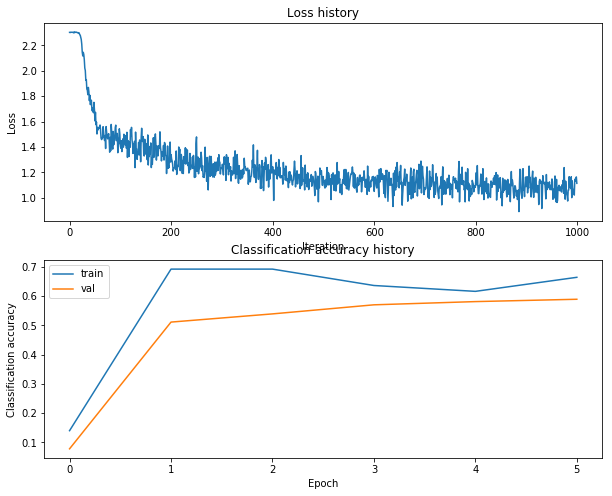

In [157]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

I've found another good Goldilocks situation. 
1. Slow learning rate + high decay -> model underfitting (low score, val=train)
2. High learning rate + low decay -> model overfitting (low score, val << train)
3. Med learning rate + high decay -> model underfitting (low score, val=train)
3. Med learning rate + low-med decay -> good performance (high score, val < train)
4. High learning rate + med-high decay -> good performance (high score, val < train)

In [161]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [7e-1, 1.5]
learning_rate_decays = [0.8]
hidden_sizes = [50, 250, 1000, 5000]
batch_sizes = [250]
regs = [1e-5]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    if bs < 500:
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=1000, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)
                    else: # try larger batch size but fewer iterations
                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=500, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 0.7 lrd: 0.8 hs: 50 bs: 250 reg: 1e-05 val: 0.55
lr: 0.7 lrd: 0.8 hs: 250 bs: 250 reg: 1e-05 val: 0.58
lr: 0.7 lrd: 0.8 hs: 1000 bs: 250 reg: 1e-05 val: 0.61
lr: 0.7 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-05 val: 0.59
lr: 1.5 lrd: 0.8 hs: 50 bs: 250 reg: 1e-05 val: 0.55
lr: 1.5 lrd: 0.8 hs: 250 bs: 250 reg: 1e-05 val: 0.60
lr: 1.5 lrd: 0.8 hs: 1000 bs: 250 reg: 1e-05 val: 0.58
lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-05 val: 0.61


In [162]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
4            1.5             0.8           50         250         0.00001   
0            0.7             0.8           50         250         0.00001   
6            1.5             0.8         1000         250         0.00001   
1            0.7             0.8          250         250         0.00001   
3            0.7             0.8         5000         250         0.00001   
5            1.5             0.8          250         250         0.00001   
2            0.7             0.8         1000         250         0.00001   
7            1.5             0.8         5000         250         0.00001   

   val_acc                                              stats  
4    0.546  {'loss_history': [2.302585090972694, 2.3038942...  
0    0.551  {'loss_history': [2.3025850673812513, 2.304308...  
6    0.580  {'loss_history': [2.3025849139050516, 2.302311...  
1    0.583  {'loss_history': [2.3025850549732296, 2.303385...  
3    0.591  {'loss_history': [2.302584727188802, 2.3032394...  
5    0.602  {'loss_history': [2.30258509427585, 2.30376127...  
2    0.607  {'loss_history': [2.3025850349889225, 2.302250...  
7    0.608  {'loss_history': [2.302585138736183, 2.3046984...

The new learning rates don't appear to benefit from larger hidden sizes, and the larger hidden sizes are considerably more computationally expensive

I want to see if longer training times allow the network to take advantage of larger hidden sizes. However, the improvement has to be very clear because this is a big increase in computational cost. 

In [167]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [7e-1]
learning_rate_decays = [0.95]
hidden_sizes = [250, 5000]
batch_sizes = [250]
regs = [1e-5]
num_iters = [500, 2000, 5000]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
nilist = []
val_acclist = []

statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    for ni in num_iters:
                        net = TwoLayerNet(input_size, hs, num_classes)


                        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                    num_iters=ni, batch_size=bs,
                                    learning_rate=lr, learning_rate_decay=lrd,
                                    reg=reg, verbose=False)



                        val_acc = (net.predict(X_val_feats) == y_val).mean()
                        val_acclist.append(val_acc)
                        lrdlist.append(lrd)
                        lrlist.append(lr)
                        hslist.append(hs)
                        bslist.append(bs)
                        reglist.append(reg)
                        nilist.append(ni)
                        statslist.append(stats)

                        print("lr: %s lrd: %s hs: %s bs: %s reg: %s ni: %s val: %.2f" % 
                              (lr, lrd, hs, bs, reg, ni, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 0.7 lrd: 0.95 hs: 250 bs: 250 reg: 1e-05 ni: 500 val: 0.56
lr: 0.7 lrd: 0.95 hs: 250 bs: 250 reg: 1e-05 ni: 2000 val: 0.57
lr: 0.7 lrd: 0.95 hs: 250 bs: 250 reg: 1e-05 ni: 5000 val: 0.55
lr: 0.7 lrd: 0.95 hs: 5000 bs: 250 reg: 1e-05 ni: 500 val: 0.56
lr: 0.7 lrd: 0.95 hs: 5000 bs: 250 reg: 1e-05 ni: 2000 val: 0.59
lr: 0.7 lrd: 0.95 hs: 5000 bs: 250 reg: 1e-05 ni: 5000 val: 0.59


In [168]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, nilist, 
                           val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','num_iters','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2            0.7            0.95          250         250         0.00001   
3            0.7            0.95         5000         250         0.00001   
0            0.7            0.95          250         250         0.00001   
1            0.7            0.95          250         250         0.00001   
4            0.7            0.95         5000         250         0.00001   
5            0.7            0.95         5000         250         0.00001   

   num_iters  val_acc                                              stats  
2       5000    0.554  {'loss_history': [2.302585066492934, 2.3027245...  
3        500    0.559  {'loss_history': [2.3025853681360324, 2.302597...  
0        500    0.562  {'loss_history': [2.3025851564624085, 2.302738...  
1       2000    0.571  {'loss_history': [2.3025851063064904, 2.301788...  
4       2000    0.595  {'loss_history': [2.302585190850793, 2.3021818...  
5       5000    0.595  {'loss_history': [2.3025860278377905, 2.302959...

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
num_iters                                                      5000
val_acc                                                     0.55400
stats             {'loss_history': [2.302585066492934, 2.3027245...
Name: 2, dtype: object


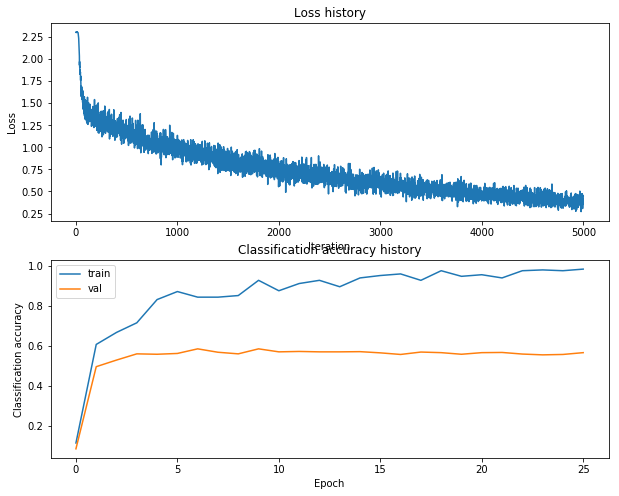

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
num_iters                                                       500
val_acc                                                     0.55900
stats             {'loss_history': [2.3025853681360324, 2.302597...
Name: 3, dtype: object


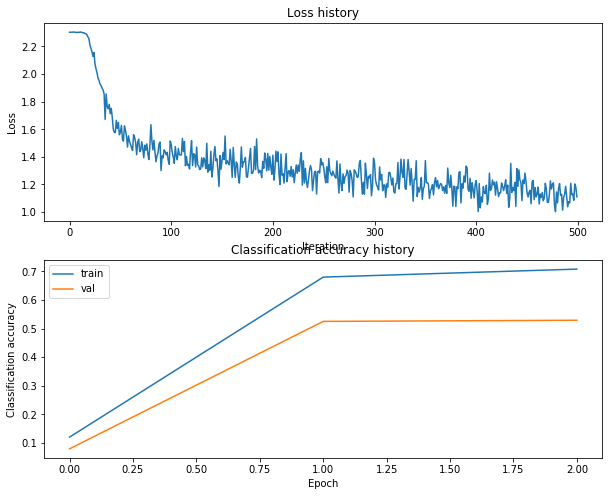

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
num_iters                                                       500
val_acc                                                     0.56200
stats             {'loss_history': [2.3025851564624085, 2.302738...
Name: 0, dtype: object


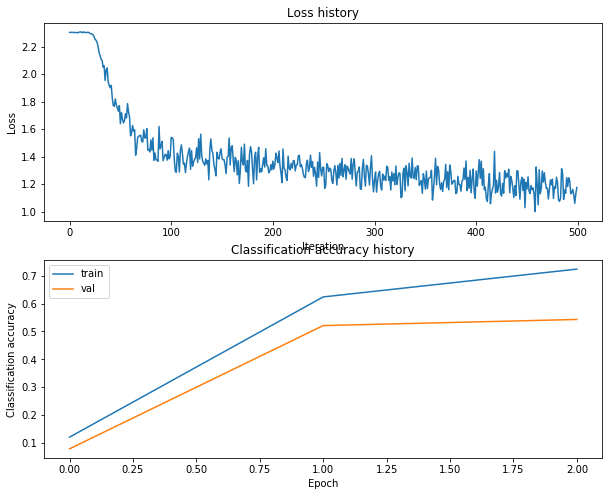

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
num_iters                                                      2000
val_acc                                                     0.57100
stats             {'loss_history': [2.3025851063064904, 2.301788...
Name: 1, dtype: object


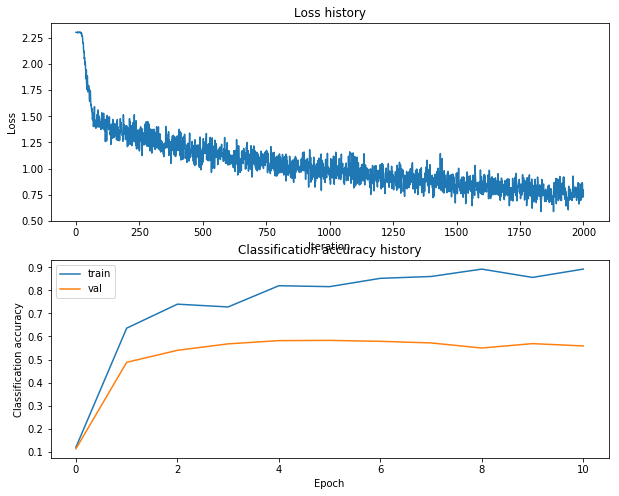

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
num_iters                                                      2000
val_acc                                                     0.59500
stats             {'loss_history': [2.302585190850793, 2.3021818...
Name: 4, dtype: object


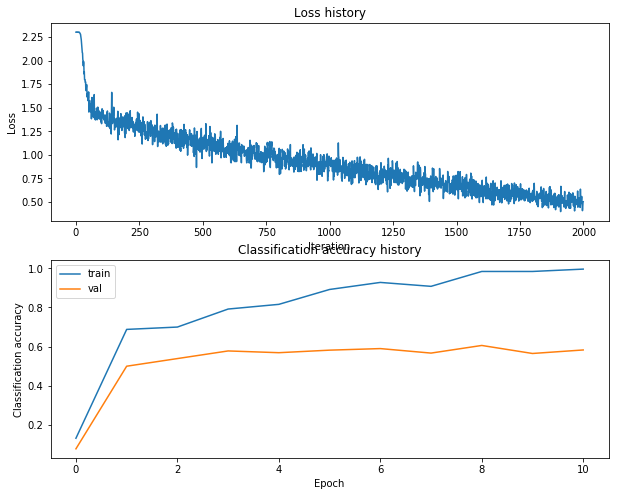

learning_rate                                               0.70000
learning_decay                                              0.95000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
num_iters                                                      5000
val_acc                                                     0.59500
stats             {'loss_history': [2.3025860278377905, 2.302959...
Name: 5, dtype: object


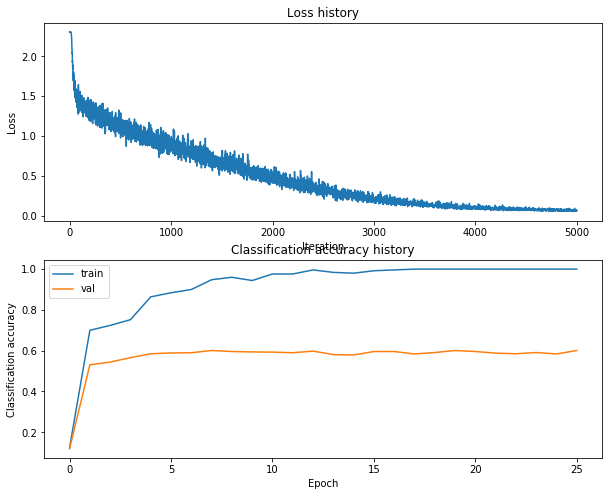

In [169]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Oops, that was silly, didn't need multiple runs at different number of iterations haha.

Even the big models show maximum validation scores at 5 epochs. Interestingly, running them for a long time never leads to a regime where the validation score goes *down*. 

I want to see if the much larger hidden size ($5000$) has an interaction with regularization

In [181]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [1.5]
learning_rate_decays = [0.8]
hidden_sizes = [250, 5000]
batch_sizes = [250]
regs = [1e-8, 1e-5, 1e-3]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                num_iters=1600, batch_size=bs,
                                learning_rate=lr, learning_rate_decay=lrd,
                                reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 1.5 lrd: 0.8 hs: 250 bs: 250 reg: 1e-08 val: 0.59
lr: 1.5 lrd: 0.8 hs: 250 bs: 250 reg: 1e-05 val: 0.58
lr: 1.5 lrd: 0.8 hs: 250 bs: 250 reg: 0.001 val: 0.58
lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-08 val: 0.61
lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-05 val: 0.61
lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 0.001 val: 0.61


In [182]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
1            1.5             0.8          250         250    1.000000e-05   
2            1.5             0.8          250         250    1.000000e-03   
0            1.5             0.8          250         250    1.000000e-08   
4            1.5             0.8         5000         250    1.000000e-05   
5            1.5             0.8         5000         250    1.000000e-03   
3            1.5             0.8         5000         250    1.000000e-08   

   val_acc                                              stats  
1    0.584  {'loss_history': [2.302584954186072, 2.3035141...  
2    0.584  {'loss_history': [2.302585903947393, 2.3056721...  
0    0.591  {'loss_history': [2.302585144054984, 2.3006924...  
4    0.607  {'loss_history': [2.302585434494084, 2.3021905...  
5    0.611  {'loss_history': [2.3025942405926196, 2.303717...  
3    0.614  {'loss_history': [2.30258592430966, 2.30787228...

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                     250
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.58400
stats             {'loss_history': [2.302584954186072, 2.3035141...
Name: 1, dtype: object


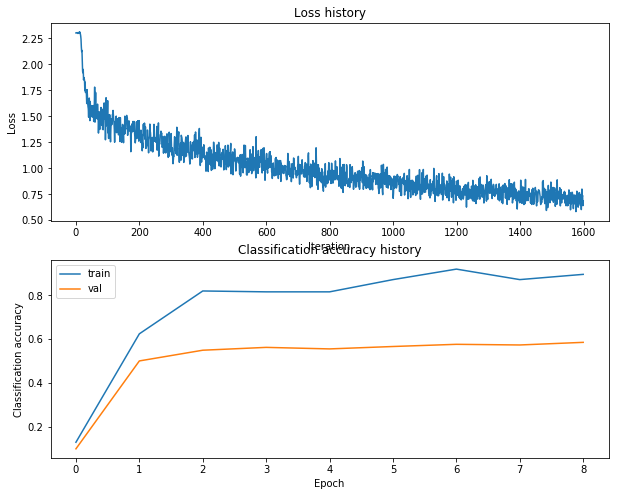

learning_rate                                                 1.500
learning_decay                                                0.800
hidden_size                                                     250
batch_size                                                      250
regularization                                                0.001
val_acc                                                       0.584
stats             {'loss_history': [2.302585903947393, 2.3056721...
Name: 2, dtype: object


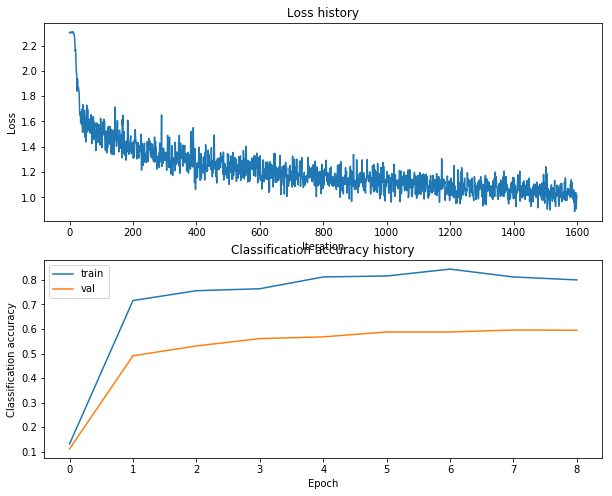

learning_rate                                                 1.500
learning_decay                                                0.800
hidden_size                                                     250
batch_size                                                      250
regularization                                                0.000
val_acc                                                       0.591
stats             {'loss_history': [2.302585144054984, 2.3006924...
Name: 0, dtype: object


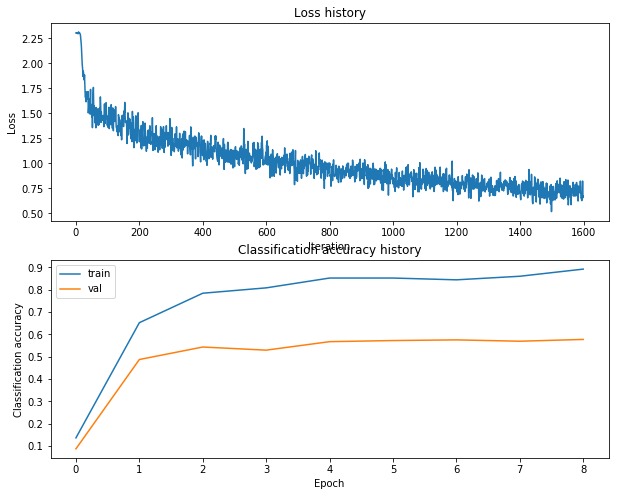

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.60700
stats             {'loss_history': [2.302585434494084, 2.3021905...
Name: 4, dtype: object


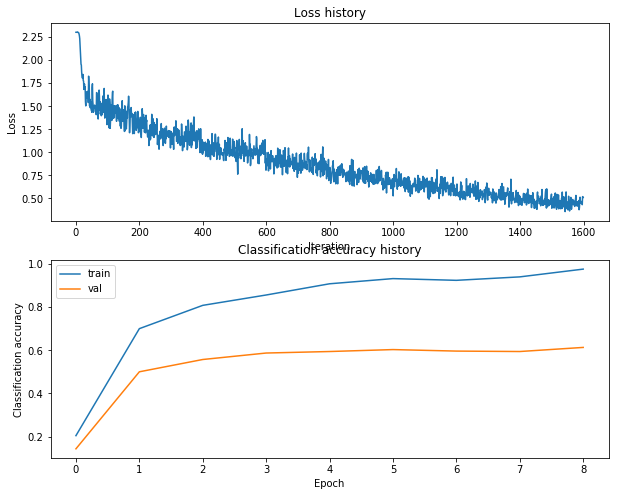

learning_rate                                                 1.500
learning_decay                                                0.800
hidden_size                                                    5000
batch_size                                                      250
regularization                                                0.001
val_acc                                                       0.611
stats             {'loss_history': [2.3025942405926196, 2.303717...
Name: 5, dtype: object


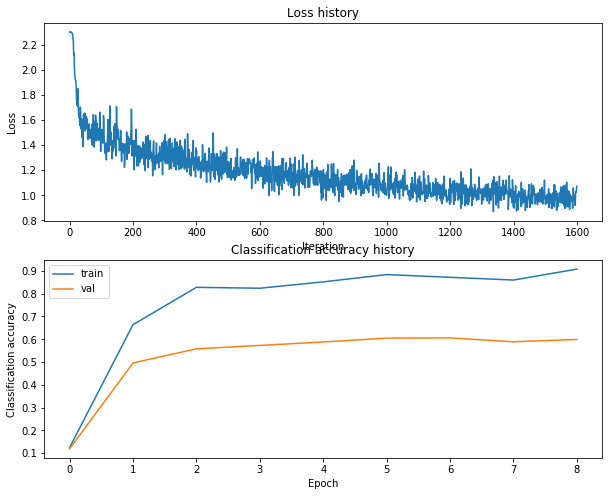

learning_rate                                                 1.500
learning_decay                                                0.800
hidden_size                                                    5000
batch_size                                                      250
regularization                                                0.000
val_acc                                                       0.614
stats             {'loss_history': [2.30258592430966, 2.30787228...
Name: 3, dtype: object


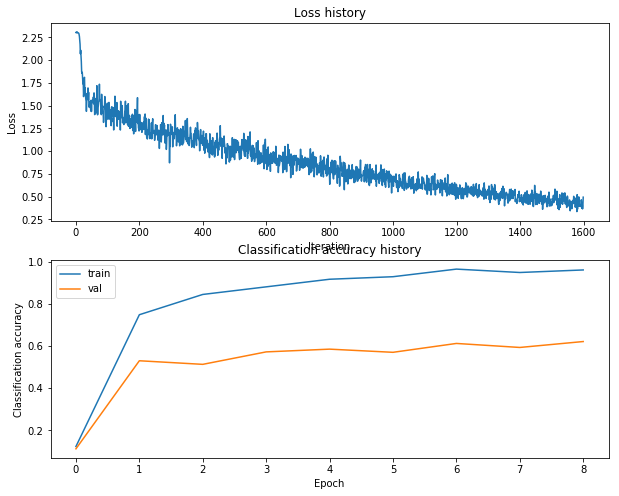

In [183]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

No. $5000$ does seem to perform *slightly* better than the smaller hidden size of $250$. Important to give it enough time to train - at least 8 epochs. 

Now that I realized I haven't been training the larger model long enough I want to check for other interactions. Regularization doesn't seem to matter - smaller leads to improved training performance but no change in validation performance. What about batch size?

In [184]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [1.5]
learning_rate_decays = [0.8]
hidden_sizes = [5000]
batch_sizes = [250, 1000, 5000]
regs = [1e-5]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                num_iters=1600, batch_size=bs,
                                learning_rate=lr, learning_rate_decay=lrd,
                                reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-05 val: 0.60
lr: 1.5 lrd: 0.8 hs: 5000 bs: 1000 reg: 1e-05 val: 0.60
lr: 1.5 lrd: 0.8 hs: 5000 bs: 5000 reg: 1e-05 val: 0.60


In [187]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2            1.5             0.8         5000        5000         0.00001   
0            1.5             0.8         5000         250         0.00001   
1            1.5             0.8         5000        1000         0.00001   

   val_acc                                              stats  
2    0.601  {'loss_history': [2.302584925169287, 2.3025291...  
0    0.605  {'loss_history': [2.3025857973863206, 2.301414...  
1    0.605  {'loss_history': [2.3025851795976506, 2.302129...

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                    5000
batch_size                                                     5000
regularization                                              0.00001
val_acc                                                     0.60100
stats             {'loss_history': [2.302584925169287, 2.3025291...
Name: 2, dtype: object


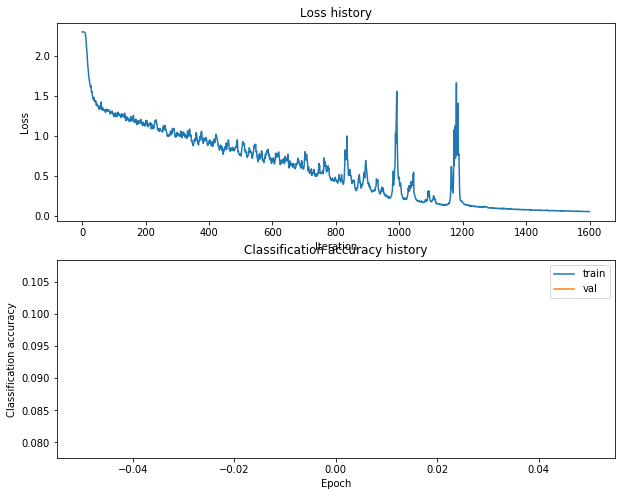

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.60500
stats             {'loss_history': [2.3025857973863206, 2.301414...
Name: 0, dtype: object


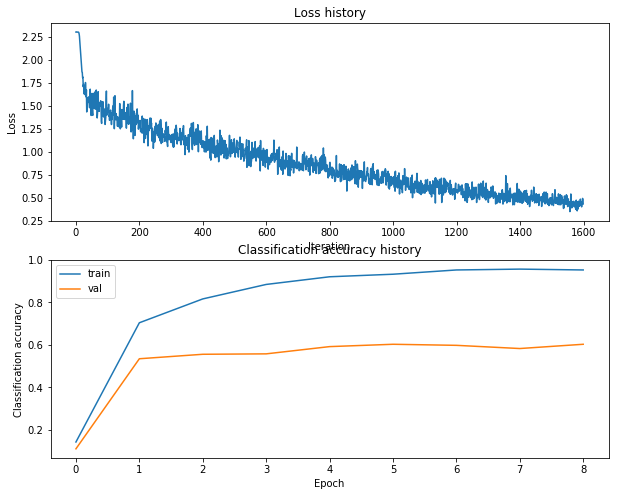

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                    5000
batch_size                                                     1000
regularization                                              0.00001
val_acc                                                     0.60500
stats             {'loss_history': [2.3025851795976506, 2.302129...
Name: 1, dtype: object


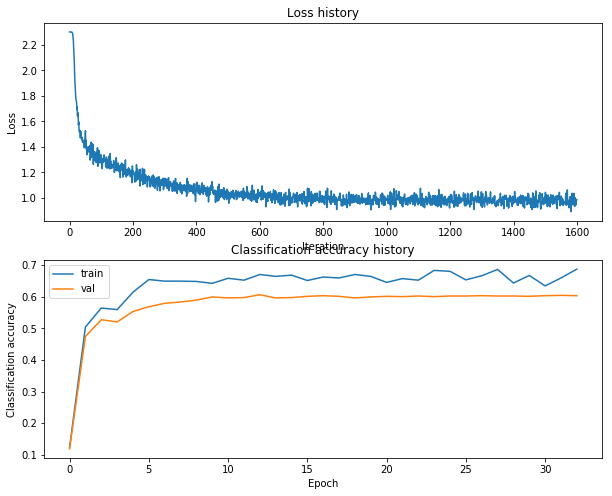

In [188]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Large batch sizes with a large hidden size produce some weird loss plots but ultimately have little beneficial effect and take *forever* to run. 

In [191]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [1.5]
learning_rate_decays = [0.8, 0.95, 0.98]
hidden_sizes = [5000]
batch_sizes = [250]
regs = [1e-5]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                num_iters=2000, batch_size=bs,
                                learning_rate=lr, learning_rate_decay=lrd,
                                reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-05 val: 0.62
lr: 1.5 lrd: 0.95 hs: 5000 bs: 250 reg: 1e-05 val: 0.60
lr: 1.5 lrd: 0.98 hs: 5000 bs: 250 reg: 1e-05 val: 0.56


In [192]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2            1.5            0.98         5000         250         0.00001   
1            1.5            0.95         5000         250         0.00001   
0            1.5            0.80         5000         250         0.00001   

   val_acc                                              stats  
2    0.560  {'loss_history': [2.3025851434798406, 2.299848...  
1    0.602  {'loss_history': [2.302584453527243, 2.3019998...  
0    0.622  {'loss_history': [2.302584440135494, 2.3036137...

learning_rate                                               1.50000
learning_decay                                              0.98000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.56000
stats             {'loss_history': [2.3025851434798406, 2.299848...
Name: 2, dtype: object


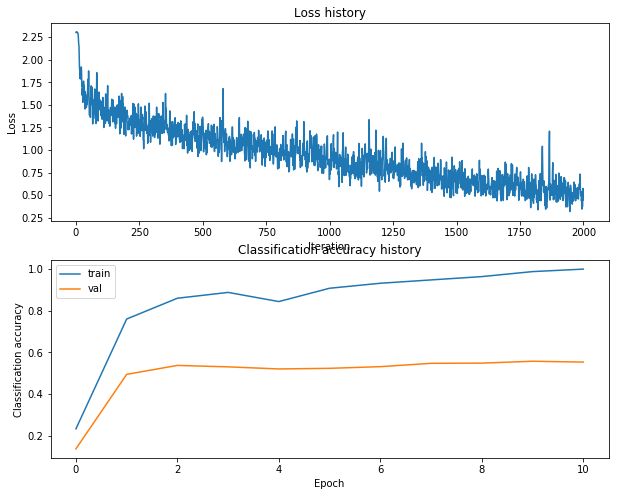

learning_rate                                               1.50000
learning_decay                                              0.95000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.60200
stats             {'loss_history': [2.302584453527243, 2.3019998...
Name: 1, dtype: object


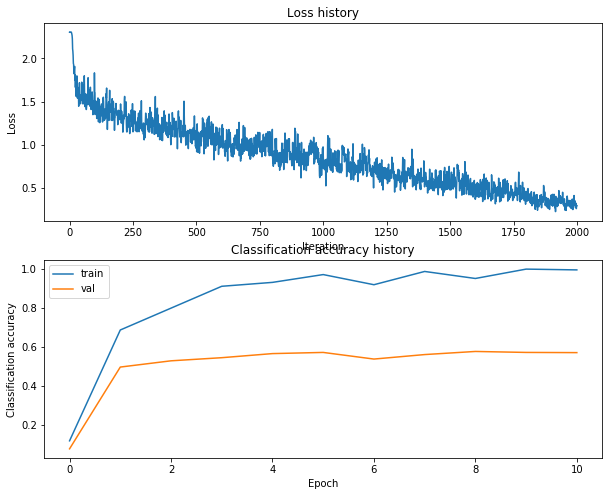

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.62200
stats             {'loss_history': [2.302584440135494, 2.3036137...
Name: 0, dtype: object


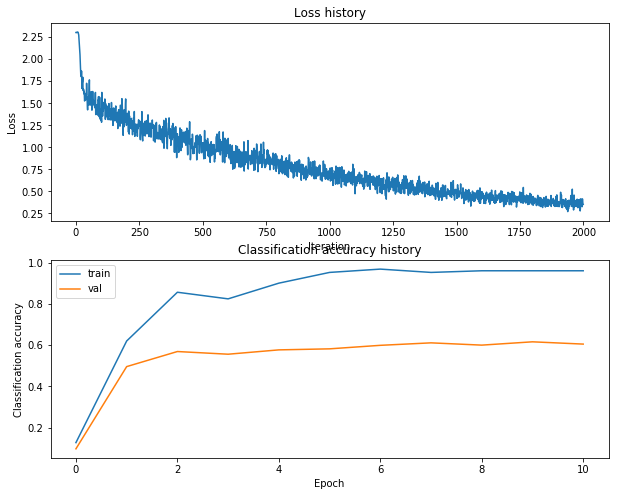

In [193]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Since we're using a big model, we should at least try increasing the number of features

In [198]:
# Preprocessing: Remove the bias dimension

X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train,X_val, X_test,
                                                                          num_color_bins=500)

print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [203]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import seaborn as sn
import pandas as pd


learning_rates = [1.5]
learning_rate_decays = [0.8]
hidden_sizes = [5000]
batch_sizes = [250]
regs = [1e-5, 3e-3, 1e-8]

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                                num_iters=2000, batch_size=bs,
                                learning_rate=lr, learning_rate_decay=lrd,
                                reg=reg, verbose=False)

                        
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    val_acclist.append(val_acc)
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
                    
                    print("lr: %s lrd: %s hs: %s bs: %s reg: %s val: %.2f" % 
                          (lr, lrd, hs, bs, reg, val_acc))

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-05 val: 0.58
lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 0.003 val: 0.59
lr: 1.5 lrd: 0.8 hs: 5000 bs: 250 reg: 1e-08 val: 0.58


In [204]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.sort_values(axis=0, by='val_acc')

learning_rate  learning_decay  hidden_size  batch_size  regularization  \
2            1.5             0.8         5000         250    1.000000e-08   
0            1.5             0.8         5000         250    1.000000e-05   
1            1.5             0.8         5000         250    3.000000e-03   

   val_acc                                              stats  
2    0.579  {'loss_history': [2.302586020718845, 2.3064070...  
0    0.584  {'loss_history': [2.3025868441642934, 2.303223...  
1    0.590  {'loss_history': [2.302683111995984, 2.3020662...

learning_rate                                                 1.500
learning_decay                                                0.800
hidden_size                                                    5000
batch_size                                                      250
regularization                                                0.000
val_acc                                                       0.579
stats             {'loss_history': [2.302586020718845, 2.3064070...
Name: 2, dtype: object


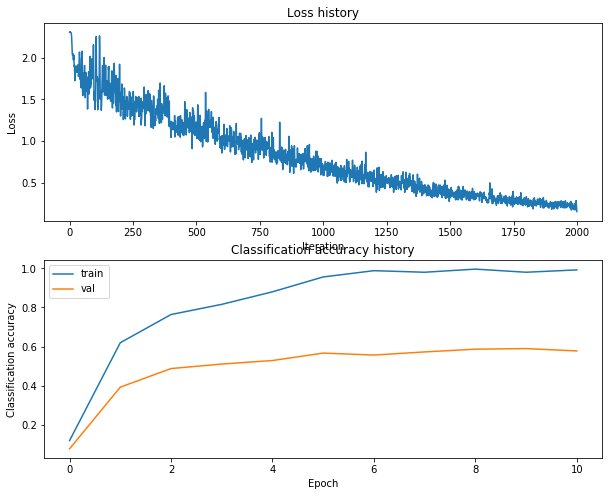

learning_rate                                               1.50000
learning_decay                                              0.80000
hidden_size                                                    5000
batch_size                                                      250
regularization                                              0.00001
val_acc                                                     0.58400
stats             {'loss_history': [2.3025868441642934, 2.303223...
Name: 0, dtype: object


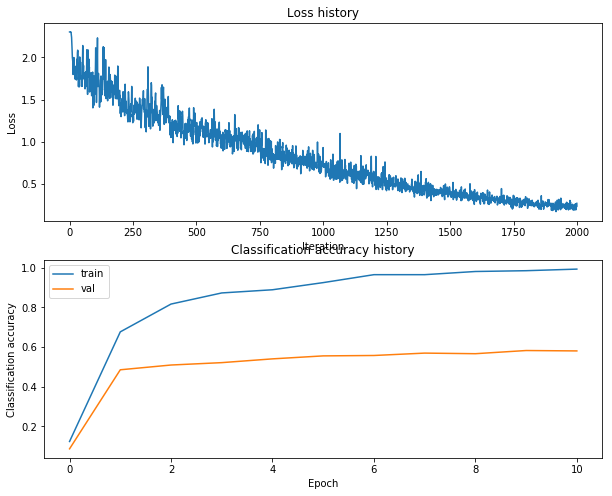

learning_rate                                                 1.500
learning_decay                                                0.800
hidden_size                                                    5000
batch_size                                                      250
regularization                                                0.003
val_acc                                                       0.590
stats             {'loss_history': [2.302683111995984, 2.3020662...
Name: 1, dtype: object


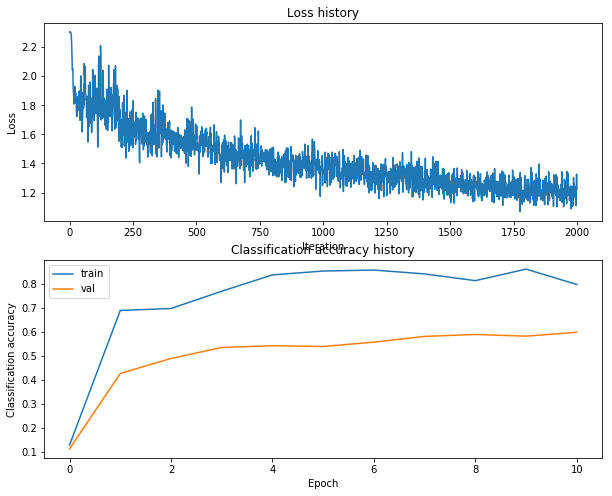

In [205]:
for index, row in df.sort_values(axis=0, by='val_acc').iterrows():
    print(row)
    plot_stats(row['stats'])

Increasing features doesn't help much. 

In [206]:
# Preprocessing: Remove the bias dimension

X_train_feats, X_val_feats, X_test_feats = extract_features_preprocess(X_train,X_val, X_test,
                                                                          num_color_bins=50)

print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [208]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

best_net = TwoLayerNet(X_train_feats.shape[1], 5000, num_classes)
best_net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=2000, batch_size=250,
                    learning_rate=1.5, learning_rate_decay=.8,
                    reg=1e-5, verbose=True) # store the best model into this 
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 1.411454
iteration 200 / 2000: loss 1.316884
iteration 300 / 2000: loss 1.088162
iteration 400 / 2000: loss 1.089465
iteration 500 / 2000: loss 1.001762
iteration 600 / 2000: loss 0.905488
iteration 700 / 2000: loss 0.846565
iteration 800 / 2000: loss 0.855103
iteration 900 / 2000: loss 0.765167
iteration 1000 / 2000: loss 0.656472
iteration 1100 / 2000: loss 0.639803
iteration 1200 / 2000: loss 0.578996
iteration 1300 / 2000: loss 0.515218
iteration 1400 / 2000: loss 0.505365
iteration 1500 / 2000: loss 0.510930
iteration 1600 / 2000: loss 0.464065
iteration 1700 / 2000: loss 0.442421
iteration 1800 / 2000: loss 0.385059
iteration 1900 / 2000: loss 0.380558
0.608


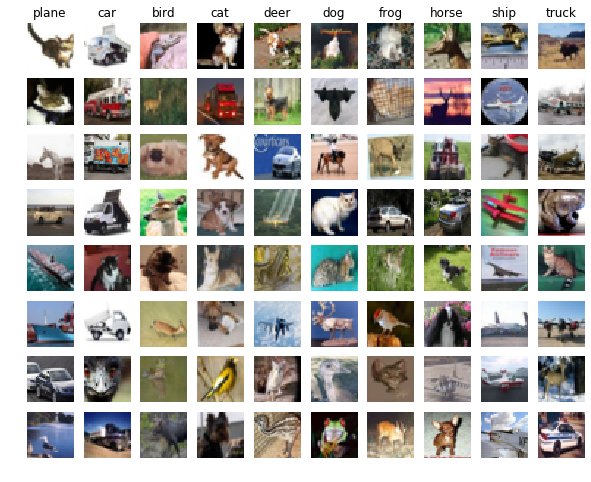

In [209]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
y_test_pred = best_net.predict(X_test_feats)
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()